In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.5.3
1.26.4
0.13.2


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format','{:.2f}'.format)

In [4]:
cr_hist = pd.read_parquet(r'D:\TrashFolder\cbu_code\credit_history.parquet')

In [5]:
geo = pd.read_xml(r'D:\TrashFolder\cbu_code\geographic_data.xml')

In [6]:
loan_det = pd.read_excel(r'D:\TrashFolder\cbu_code\loan_details.xlsx')

In [7]:
fin_rat = pd.read_json(r'D:\TrashFolder\cbu_code\financial_ratios.jsonl', lines=True)

In [8]:
app_data = pd.read_csv(r'D:\TrashFolder\cbu_code\application_metadata.csv')

In [9]:
demo = pd.read_csv(r'D:\TrashFolder\cbu_code\demographics.csv')

In [16]:
loan_det

customer_id      loan_type loan_amount  loan_term  interest_rate  \
0            10000       Personal     $17,700         36          12.50   
1            10001       mortgage    $114,000        180           6.83   
2            10002  Personal Loan       9,300         36          13.99   
3            10003       PERSONAL       $8700         48          13.26   
4            10004       Personal      $7,200         24          10.77   
...            ...            ...         ...        ...            ...   
89994        99994       personal     $11,300         24           9.70   
89995        99995       personal      16,500         36          11.67   
89996        99996  Personal Loan      17,800         36          14.99   
89997        99997    Credit Card      $11700          0          19.10   
89998        99998       Mortgage     $487100        360           5.03   

             loan_purpose  loan_to_value_ratio origination_channel  \
0      Debt Consolidation                0.000         Direct Mail   
1               Refinance                0.774              Branch   
2          Major Purchase                0.000              Online   
3                 Medical                0.000              Online   
4      Debt Consolidation                0.000              Branch   
...                   ...                  ...                 ...   
89994    Home Improvement                0.000              Branch   
89995               Other                0.000              Branch   
89996      Major Purchase                0.000              Online   
89997    Revolving Credit                0.000              Branch   
89998           Refinance                0.894              Online   

       loan_officer_id marketing_campaign  
0                 1045                  W  
1                 1011                  B  
2                 1084                  K  
3                 1048                  A  
4                 1055                  S  
...                ...                ...  
89994             1050                  O  
89995             1071                  D  
89996             1046                  J  
89997              997                  K  
89998             1003                  J  

[89999 rows x 10 columns]

In [17]:
cr_hist

customer_number  credit_score  num_credit_accounts  \
0                10000           696                   14   
1                10001           659                   13   
2                10002           662                    3   
3                10003           676                    8   
4                10004           678                    7   
...                ...           ...                  ...   
89994            99994           817                   10   
89995            99995           745                    9   
89996            99996           607                   11   
89997            99997           678                   10   
89998            99998           730                   16   

       oldest_credit_line_age  oldest_account_age_months  total_credit_limit  \
0                        22.8                      273.6            169100.0   
1                         3.5                       42.0             78200.0   
2                         0.0                        0.0             41400.0   
3                         9.0                      108.0             60000.0   
4                         8.0                       96.0             49700.0   
...                       ...                        ...                 ...   
89994                     8.2                       98.4            135600.0   
89995                     8.8                      105.6             44600.0   
89996                     1.0                       12.0             18300.0   
89997                     3.0                       36.0             54300.0   
89998                    15.8                      189.6             23700.0   

       num_delinquencies_2yrs  num_inquiries_6mo  recent_inquiry_count  \
0                         0.0                  2                     2   
1                         0.0                  6                     6   
2                         0.0                  2                     2   
3                         0.0                  1                     1   
4                         0.0                  1                     1   
...                       ...                ...                   ...   
89994                     0.0                  1                     1   
89995                     0.0                  1                     1   
89996                     0.0                  2                     2   
89997                     0.0                  3                     3   
89998                     0.0                  5                     5   

       num_public_records  num_collections  account_diversity_index  
0                       1                0                    0.499  
1                       0                0                    0.298  
2                       0                0                    0.174  
3                       0                0                    0.263  
4                       0                0                    0.298  
...                   ...              ...                      ...  
89994                   0                0                    0.285  
89995                   0                0                    0.353  
89996                   1                0                    0.238  
89997                   0                0                    0.227  
89998                   0                0                    0.532  

[89999 rows x 12 columns]

In [18]:
geo

id state  regional_unemployment_rate  regional_median_income  \
0      10000    OH                         4.8                   56000   
1      10001    PA                         4.4                   61000   
2      10002    VA                         3.9                   74000   
3      10003    CA                         5.8                   75000   
4      10004    WA                         5.8                   78000   
...      ...   ...                         ...                     ...   
89994  99994    CA                         5.8                   75000   
89995  99995    IL                         4.9                   65000   
89996  99996    CA                         5.4                   75000   
89997  99997    GA                         4.3                   58000   
89998  99998    TX                         3.9                   61000   

       regional_median_rent  housing_price_index  cost_of_living_index  \
0                    1380.0                 91.0                  73.0   
1                    1510.0                 92.0                  87.0   
2                    1920.0                125.0                 103.0   
3                    1690.0                158.0                 121.0   
4                    1700.0                152.0                 127.0   
...                     ...                  ...                   ...   
89994                1830.0                168.0                 138.0   
89995                1900.0                 99.0                  84.0   
89996                1560.0                157.0                 127.0   
89997                1310.0                103.0                  92.0   
89998                1310.0                115.0                  92.0   

       previous_zip_code  
0                    451  
1                    537  
2                    679  
3                    719  
4                    933  
...                  ...  
89994                933  
89995                536  
89996                193  
89997                555  
89998                627  

[89999 rows x 8 columns]

In [20]:
fin_rat

cust_num monthly_income existing_monthly_debt monthly_payment  \
0         10000       5,150.00                738.64         $592.13   
1         10001       2,383.33                392.21        1,013.86   
2         10002       1,725.00                204.07         $317.81   
3         10003       2,616.67               $288.71          234.52   
4         10004       2,050.00               $248.77          334.81   
...         ...            ...                   ...             ...   
89994     99994       6,025.00              2,120.97          519.87   
89995     99995      $1,666.67                138.97         $545.44   
89996     99996       1,666.67               $129.90          616.96   
89997     99997      $1,666.67                162.11         $351.00   
89998     99998       2,133.33                303.19        2,623.80   

       debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
0                     0.258            0.258402                    0.115   
1                     0.590            0.589959                    0.425   
2                     0.303            0.302539                    0.184   
3                     0.200            0.199961                    0.090   
4                     0.285            0.284673                    0.163   
...                     ...                 ...                      ...   
89994                 0.438            0.438314                    0.086   
89995                 0.411            0.410646                    0.327   
89996                 0.448            0.448116                    0.370   
89997                 0.308            0.307866                    0.211   
89998                 1.372            1.372027                    1.230   

       credit_utilization revolving_balance credit_usage_amount  \
0                   0.841       $142,213.10         $142,213.10   
1                   0.971        $75,932.20           75,932.20   
2                   0.539           22314.6           22,314.60   
3                   0.147          8,820.00              8820.0   
4                   0.488           24253.6             24253.6   
...                   ...               ...                 ...   
89994               0.359         48,680.40           48,680.40   
89995               0.355         15,833.00             15833.0   
89996               0.669         12,242.70             12242.7   
89997               0.562        $30,516.60           30,516.60   
89998               0.248            5877.6              5877.6   

      available_credit total_monthly_debt_payment  annual_debt_payment  \
0           $26,886.90                    1330.77             15969.24   
1            $2,267.80                    1406.07             16872.84   
2           $19,085.40                     521.88              6262.56   
3            51,180.00                     523.23              6278.76   
4            25,446.40                     583.58              7002.96   
...                ...                        ...                  ...   
89994       $86,919.60                   2,640.84             31690.08   
89995       $28,767.00                    $684.41              8212.92   
89996        $6,057.30                    $746.86              8962.32   
89997          23783.4                     513.11              6157.32   
89998        17,822.40                   2,926.99             35123.88   

       loan_to_annual_income total_debt_amount monthly_free_cash_flow  
0                   0.286408        159,913.10               3,819.23  
1                   3.986014        189,932.20                $977.26  
2                   0.449275           31614.6                1203.12  
3                   0.277070        $17,520.00     2093.4366666666665  
4                   0.292683        $31,453.60                1466.42  
...                      ...               ...                    ...  
89994               0.156293   

In [21]:
app_data

customer_ref  application_id  application_hour  \
0             10000          620515                 5   
1             10001          624978                 4   
2             10002          564658                10   
3             10003          621493                 7   
4             10004          637785                 1   
...             ...             ...               ...   
89994         99994          585752                13   
89995         99995          595205                13   
89996         99996          544796                 7   
89997         99997          560885                 8   
89998         99998          613089                15   

       application_day_of_week  account_open_year preferred_contact  \
0                            6               2013              Mail   
1                            2               2015             Phone   
2                            3               2020             Phone   
3                            5               2010             Email   
4                            2               2020              Mail   
...                        ...                ...               ...   
89994                        5               2016             Email   
89995                        5               2014              Mail   
89996                        5               2010              Mail   
89997                        3               2021             Email   
89998                        5               2022              Mail   

      referral_code account_status_code  random_noise_1  num_login_sessions  \
0           REF0000               ACT-2        1.137099                  13   
1           REF0000               ACT-3       -0.164932                   6   
2           REF0000               ACT-3        0.526700                   1   
3           REF0000                 A01       -0.709779                   4   
4           REF0000               ACT-3       -0.603132                   6   
...             ...                 ...             ...                 ...   
89994       REF0000                 A01        1.628917                  10   
89995       REF9754              ACTIVE       -0.501960                  12   
89996       REF0000                 A01       -0.964956                   4   
89997       REF0000               ACT-1        0.328372                   5   
89998       REF0000              ACTIVE       -0.318403                   5   

       num_customer_service_calls  has_mobile_app  paperless_billing  default  
0                               2               1                  1        0  
1                               1               1                  1        1  
2                               2               1                  0        0  
3                               1               1                  1        0  
4                               2               1                  0        0  
...                           ...             ...                ...      ...  
89994                           3               0                  1        0  
89995                           1               1                  0        0  
89996                           2               1                  1        1  
89997                           2               0                  0        0  
89998                           3               1                  0        0  

[89999 rows x 14 columns]

In [22]:
demo

cust_id  age annual_income  employment_length employment_type  \
0        10000   41        $61800                2.2       Full-time   
1        10001   38        28,600                7.0       FULL_TIME   
2        10002   18       $20,700                0.8       FULL_TIME   
3        10003   27        31,400                4.8       Full Time   
4        10004   26        $24600                5.2        Fulltime   
...        ...  ...           ...                ...             ...   
89994    99994   52       $72,300                3.7       Full-time   
89995    99995   61        20,000                4.2       Full-time   
89996    99996   19       $20,000                1.5        Fulltime   
89997    99997   21       $20,000                3.5              FT   
89998    99998   36        $25600                2.0   Self Employed   

         education marital_status  num_dependents  
0         Graduate        Married               2  
1      High School        Married               0  
2         Bachelor         Single               0  
3         Bachelor         Single               0  
4      High School         Single               0  
...            ...            ...             ...  
89994     Bachelor         Single               1  
89995  High School       Divorced               1  
89996  High School        Married               3  
89997  High School        Married               1  
89998     Bachelor        Married               3  

[89999 rows x 8 columns]

In [10]:
total_df = demo.merge(app_data, how='outer',left_on='cust_id',right_on='customer_ref')\
    .merge(fin_rat, how='outer',left_on='cust_id',right_on='cust_num')\
    .merge(geo,how='outer',left_on='cust_id',right_on='id')\
    .merge(cr_hist, how='outer', left_on='cust_id', right_on='customer_number')\
    .merge(loan_det, how='outer', left_on='cust_id', right_on='customer_id')


In [42]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cust_id                     89999 non-null  int64  
 1   age                         89999 non-null  int64  
 2   annual_income               89999 non-null  object 
 3   employment_length           87746 non-null  float64
 4   employment_type             89999 non-null  object 
 5   education                   89999 non-null  object 
 6   marital_status              89999 non-null  object 
 7   num_dependents              89999 non-null  int64  
 8   customer_ref                89999 non-null  int64  
 9   application_id              89999 non-null  int64  
 10  application_hour            89999 non-null  int64  
 11  application_day_of_week     89999 non-null  int64  
 12  account_open_year           89999 non-null  int64  
 13  preferred_contact           899

In [11]:
drop_list = ['cust_id', 'customer_ref', 'application_id', 'id','customer_id', 'cust_num','customer_number','random_noise_1']

In [12]:
total_df = total_df[[x for x in total_df.columns if x not in drop_list]]

In [13]:
total_df

age annual_income  employment_length employment_type    education  \
0       41        $61800               2.20       Full-time     Graduate   
1       38        28,600               7.00       FULL_TIME  High School   
2       18       $20,700               0.80       FULL_TIME     Bachelor   
3       27        31,400               4.80       Full Time     Bachelor   
4       26        $24600               5.20        Fulltime  High School   
...    ...           ...                ...             ...          ...   
89994   52       $72,300               3.70       Full-time     Bachelor   
89995   61        20,000               4.20       Full-time  High School   
89996   19       $20,000               1.50        Fulltime  High School   
89997   21       $20,000               3.50              FT  High School   
89998   36        $25600               2.00   Self Employed     Bachelor   

      marital_status  num_dependents  application_hour  \
0            Married               2                 5   
1            Married               0                 4   
2             Single               0                10   
3             Single               0                 7   
4             Single               0                 1   
...              ...             ...               ...   
89994         Single               1                13   
89995       Divorced               1                13   
89996        Married               3                 7   
89997        Married               1                 8   
89998        Married               3                15   

       application_day_of_week  account_open_year preferred_contact  \
0                            6               2013              Mail   
1                            2               2015             Phone   
2                            3               2020             Phone   
3                            5               2010             Email   
4                            2               2020              Mail   
...                        ...                ...               ...   
89994                        5               2016             Email   
89995                        5               2014              Mail   
89996                        5               2010              Mail   
89997                        3               2021             Email   
89998                        5               2022              Mail   

      referral_code account_status_code  num_login_sessions  \
0           REF0000               ACT-2                  13   
1           REF0000               ACT-3                   6   
2           REF0000               ACT-3                   1   
3           REF0000                 A01                   4   
4           REF0000               ACT-3                   6   
...             ...                 ...                 ...   
89994       REF0000                 A01                  10   
89995       REF9754              ACTIVE                  12   
89996       REF0000                 A01                   4   
89997       REF0000               ACT-1                   5   
89998       REF0000              ACTIVE                   5   

       num_customer_service_calls  has_mobile_app  paperless_billing  default  \
0                               2               1                  1        0   
1                               1               1                  1        1   
2                               2               1                  0        0   
3                               1               1                  1        0   
4                               2               1                  0        0   
...                           ...             ...                ...      ...   
89994                           3               0                  1        0   
89995                           1               1                  0        0   
89996                           2               1         

In [16]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         89999 non-null  int64  
 1   annual_income               89999 non-null  object 
 2   employment_length           87746 non-null  float64
 3   employment_type             89999 non-null  object 
 4   education                   89999 non-null  object 
 5   marital_status              89999 non-null  object 
 6   num_dependents              89999 non-null  int64  
 7   application_hour            89999 non-null  int64  
 8   application_day_of_week     89999 non-null  int64  
 9   account_open_year           89999 non-null  int64  
 10  preferred_contact           89999 non-null  object 
 11  referral_code               89999 non-null  object 
 12  account_status_code         89999 non-null  object 
 13  random_noise_1              899

In [13]:
total_df['annual_income'] = total_df['annual_income'].str.replace('$','').str.replace(',','').astype('float64')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\4101120361.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_df['annual_income'] = total_df['annual_income'].str.replace('$','').str.replace(',','').astype('float64')


In [14]:
total_df['employment_length'] = total_df['employment_length'].fillna(total_df['employment_length'].median())

In [96]:
total_df.describe()

age  annual_income  employment_length  num_dependents  \
count 89999.000      89999.000          89999.000       89999.000   
mean     38.715      47586.732              5.507           1.199   
std      10.805      26691.160              3.227           1.137   
min      18.000      20000.000              0.000           0.000   
25%      31.000      28100.000              3.000           0.000   
50%      38.000      41100.000              5.200           1.000   
75%      46.000      59300.000              7.600           2.000   
max      74.000     487200.000             23.900           5.000   

       application_hour  application_day_of_week  account_open_year  \
count         89999.000                89999.000          89999.000   
mean             11.476                    2.994           2016.498   
std               6.901                    2.006              4.021   
min               0.000                    0.000           2010.000   
25%               6.000                    1.000           2013.000   
50%              11.000                    3.000           2017.000   
75%              17.000                    5.000           2020.000   
max              23.000                    6.000           2023.000   

       random_noise_1  num_login_sessions  num_customer_service_calls  \
count       89999.000           89999.000                   89999.000   
mean            0.000               8.814                       1.995   
std             0.997               3.823                       1.413   
min            -4.091               1.000                       0.000   
25%            -0.672               6.000                       1.000   
50%             0.003               8.000                       2.000   
75%             0.669              11.000                       3.000   
max             5.236              34.000                      11.000   

       has_mobile_app  paperless_billing   default  cust_num  \
count       89999.000          89999.000 89999.000 89999.000   
mean            0.713              0.620     0.051 54999.000   
std             0.452              0.485     0.220 25980.618   
min             0.000              0.000     0.000 10000.000   
25%             0.000              0.000     0.000 32499.500   
50%             1.000              1.000     0.000 54999.000   
75%             1.000              1.000     0.000 77498.500   
max             1.000              1.000     1.000 99998.000   

       debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
count             89999.000           89999.000                89999.000   
mean                  0.531               0.531                    0.306   
std                   0.380               0.380                    0.366   
min                   0.054               0.054                    0.002   
25%                   0.296               0.296                    0.077   
50%                   0.424               0.424                    0.169   
75%                   0.628               0.628                    0.384   
max                   4.630               4.630                    4.526   

       credit_utilization  annual_debt_payment  loan_to_annual_income  \
count           89999.000            89999.000              89999.000   
mean                0.441            21862.326                  2.873   
std                 0.184            13270.506                  4.619   
min                 0.013             1333.560                  0.005   
25%                 0.306            11762.880                  0.218   
50%                 0.434            18655.320                  0.513   
75%                 0.566            29173.080                  3.990   
max                 1.000           129672.840                 38.127   

       regional_unemployment_rate  regional_median_income  \
count                   89999.000               89999.000   
mean                        4.683               64

In [19]:
total_df['employment_type'].unique()

array(['Full-time', 'FULL_TIME', 'Full Time', 'Fulltime', 'Part Time',
       'Self Employed', 'FT', 'Self Emp', 'Contractor', 'Self-employed',
       'SELF_EMPLOYED', 'Contract', 'PART_TIME', 'CONTRACT', 'PT',
       'Part-time'], dtype=object)

In [20]:
total_df['employment_type']

0            Full-time
1            FULL_TIME
2            FULL_TIME
3            Full Time
4             Fulltime
             ...      
89994        Full-time
89995        Full-time
89996         Fulltime
89997               FT
89998    Self Employed
Name: employment_type, Length: 89999, dtype: object

In [15]:
ft_list = ['Full-time','FULL_TIME','Full Time', 'Fulltime','FT']

In [16]:
pt_list = ['Part Time','PART_TIME','PT','Part-time']

In [17]:
con_list = ['Contract','CONTRACT','Contractor']

In [18]:
se_list = ['Self Employed','Self Emp','Self-employed','SELF_EMPLOYED']

In [19]:
def employment_func(x):
    if x in ft_list:
        return 'FT'
    elif x in pt_list:
        return 'PT'
    elif x in con_list:
        return 'Contract'
    elif x in se_list:
        return 'SE'

In [20]:
total_df['employment_type'] = total_df['employment_type'].apply(employment_func)

In [27]:
total_df['education'].value_counts()

Bachelor        26326
Some College    21543
High School     18794
Graduate        15585
Advanced         7751
Name: education, dtype: int64

In [28]:
total_df['marital_status'].value_counts()

Married     51889
Single      29806
Divorced     8304
Name: marital_status, dtype: int64

In [29]:
total_df['preferred_contact'].value_counts()

Email    54094
Phone    27023
Mail      8882
Name: preferred_contact, dtype: int64

In [30]:
total_df['referral_code'].value_counts()

REF0000    71987
REF4315       13
REF9450        9
REF4048        9
REF6347        8
           ...  
REF1093        1
REF7470        1
REF4067        1
REF6923        1
REF3820        1
Name: referral_code, Length: 7805, dtype: int64

In [31]:
total_df['account_status_code'].value_counts()

ACT-1     18118
ACTIVE    18093
A01       18081
ACT-2     17989
ACT-3     17718
Name: account_status_code, dtype: int64

In [21]:
total_df['monthly_income'] = total_df['monthly_income'].str.replace('$','').str.replace(',','').astype('float64')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\3996894901.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_df['monthly_income'] = total_df['monthly_income'].str.replace('$','').str.replace(',','').astype('float64')


In [22]:
total_df['monthly_payment'] = total_df['monthly_payment'].str.replace('$','').str.replace(',','').astype('float64')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\2370678046.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_df['monthly_payment'] = total_df['monthly_payment'].str.replace('$','').str.replace(',','').astype('float64')


In [181]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         89999 non-null  int64  
 1   annual_income               89999 non-null  float64
 2   employment_length           89999 non-null  float64
 3   employment_type             89999 non-null  object 
 4   education                   89999 non-null  object 
 5   marital_status              89999 non-null  object 
 6   num_dependents              89999 non-null  int64  
 7   application_hour            89999 non-null  int64  
 8   application_day_of_week     89999 non-null  int64  
 9   account_open_year           89999 non-null  int64  
 10  preferred_contact           89999 non-null  object 
 11  referral_code               89999 non-null  object 
 12  account_status_code         89999 non-null  object 
 13  random_noise_1              899

In [23]:
total_df['existing_monthly_debt'] = total_df['existing_monthly_debt'].str.replace('$','').str.replace(',','').astype('float64')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\3569720968.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_df['existing_monthly_debt'] = total_df['existing_monthly_debt'].str.replace('$','').str.replace(',','').astype('float64')


In [24]:
total_df['revolving_balance'] = total_df['revolving_balance'].str.replace('$','').str.replace(',','').astype('float64')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\2378897554.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_df['revolving_balance'] = total_df['revolving_balance'].str.replace('$','').str.replace(',','').astype('float64')


In [143]:
total_df['revolving_balance'].describe()

count    88622.000
mean     39561.296
std      34766.282
min        804.300
25%      16560.000
50%      29294.700
75%      50941.825
max     442616.200
Name: revolving_balance, dtype: float64

In [144]:
total_df['revolving_balance'].value_counts()

18468.000     11
14784.000     10
10483.200     10
13923.000      9
24864.000      9
              ..
73246.800      1
101834.400     1
95882.400      1
27439.200      1
30516.600      1
Name: revolving_balance, Length: 70650, dtype: int64

In [145]:
total_df['revolving_balance'].isnull().sum()

1377

In [25]:
total_df['revolving_balance'].fillna(total_df['revolving_balance'].median(), inplace=True)

In [26]:
for item in ['credit_usage_amount' ,'available_credit' , 'total_monthly_debt_payment' ]:
    total_df[item] = total_df[item].str.replace('$','').str.replace(',','').astype('float64')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\3737809221.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_df[item] = total_df[item].str.replace('$','').str.replace(',','').astype('float64')


In [27]:
for item in ['monthly_free_cash_flow' ,'total_debt_amount']:
    total_df[item] = total_df[item].str.replace('$','').str.replace(',','').astype('float64')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\4259839403.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_df[item] = total_df[item].str.replace('$','').str.replace(',','').astype('float64')


In [155]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         89999 non-null  int64  
 1   annual_income               89999 non-null  float64
 2   employment_length           89999 non-null  float64
 3   employment_type             89999 non-null  object 
 4   education                   89999 non-null  object 
 5   marital_status              89999 non-null  object 
 6   num_dependents              89999 non-null  int64  
 7   application_hour            89999 non-null  int64  
 8   application_day_of_week     89999 non-null  int64  
 9   account_open_year           89999 non-null  int64  
 10  preferred_contact           89999 non-null  object 
 11  referral_code               89999 non-null  object 
 12  account_status_code         89999 non-null  object 
 13  random_noise_1              899

In [186]:
total_df['loan_type'].value_counts()

Personal         9097
Personal Loan    9061
personal         9050
PERSONAL         9024
Mortgage         7919
Home Loan        7850
MORTGAGE         7841
mortgage         7819
Credit Card      5698
CreditCard       5659
credit card      5497
CC               5484
Name: loan_type, dtype: int64

In [28]:
def loan_type_func(x):
    if x in ['Personal Loan','personal','PERSONAL','Personal']:
        return 'Personal'
    elif x in ['MORTGAGE','mortgage','Mortgage']:
        return 'Mortgage'
    elif x in ['Credit Card','CreditCard','credit card','CC']:
        return 'credit_card'
    else:
        return 'Home Loan'

In [29]:
total_df['loan_type'] = total_df['loan_type'].apply(loan_type_func)

In [31]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         89999 non-null  int64  
 1   annual_income               89999 non-null  float64
 2   employment_length           89999 non-null  float64
 3   employment_type             89999 non-null  object 
 4   education                   89999 non-null  object 
 5   marital_status              89999 non-null  object 
 6   num_dependents              89999 non-null  int64  
 7   application_hour            89999 non-null  int64  
 8   application_day_of_week     89999 non-null  int64  
 9   account_open_year           89999 non-null  int64  
 10  preferred_contact           89999 non-null  object 
 11  referral_code               89999 non-null  object 
 12  account_status_code         89999 non-null  object 
 13  num_login_sessions          899

In [30]:
total_df['num_delinquencies_2yrs'] = total_df['num_delinquencies_2yrs'].fillna(0)

In [31]:
total_df['loan_amount'] = total_df['loan_amount'].str.replace('$','').str.replace(',','').astype('float64')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\888085592.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  total_df['loan_amount'] = total_df['loan_amount'].str.replace('$','').str.replace(',','').astype('float64')


In [201]:
total_df['loan_purpose'].value_counts()

Revolving Credit      22338
Home Purchase         18937
Debt Consolidation    12712
Refinance             12492
Home Improvement       7288
Major Purchase         7206
Medical                5451
Other                  3575
Name: loan_purpose, dtype: int64

In [202]:
total_df['origination_channel'].value_counts()

Online         40864
Branch         26595
Broker         17998
Direct Mail     4542
Name: origination_channel, dtype: int64

In [203]:
total_df['marketing_campaign'].value_counts()

Q    3549
N    3541
O    3535
J    3522
E    3511
X    3503
I    3492
M    3486
Z    3485
H    3485
K    3468
A    3463
B    3460
G    3459
V    3458
T    3453
D    3452
C    3451
S    3446
Y    3434
F    3429
U    3420
P    3399
R    3386
W    3369
L    3343
Name: marketing_campaign, dtype: int64

In [204]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         89999 non-null  int64  
 1   annual_income               89999 non-null  float64
 2   employment_length           89999 non-null  float64
 3   employment_type             89999 non-null  object 
 4   education                   89999 non-null  object 
 5   marital_status              89999 non-null  object 
 6   num_dependents              89999 non-null  int64  
 7   application_hour            89999 non-null  int64  
 8   application_day_of_week     89999 non-null  int64  
 9   account_open_year           89999 non-null  int64  
 10  preferred_contact           89999 non-null  object 
 11  referral_code               89999 non-null  object 
 12  account_status_code         89999 non-null  object 
 13  random_noise_1              899

In [35]:
total_df.to_csv(r'D:\TrashFolder\cbu_code\total_df2.csv')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_7604\3568545443.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(total_df.corr(), xticklabels=total_df.columns, yticklabels=total_df.columns)


<Axes: >

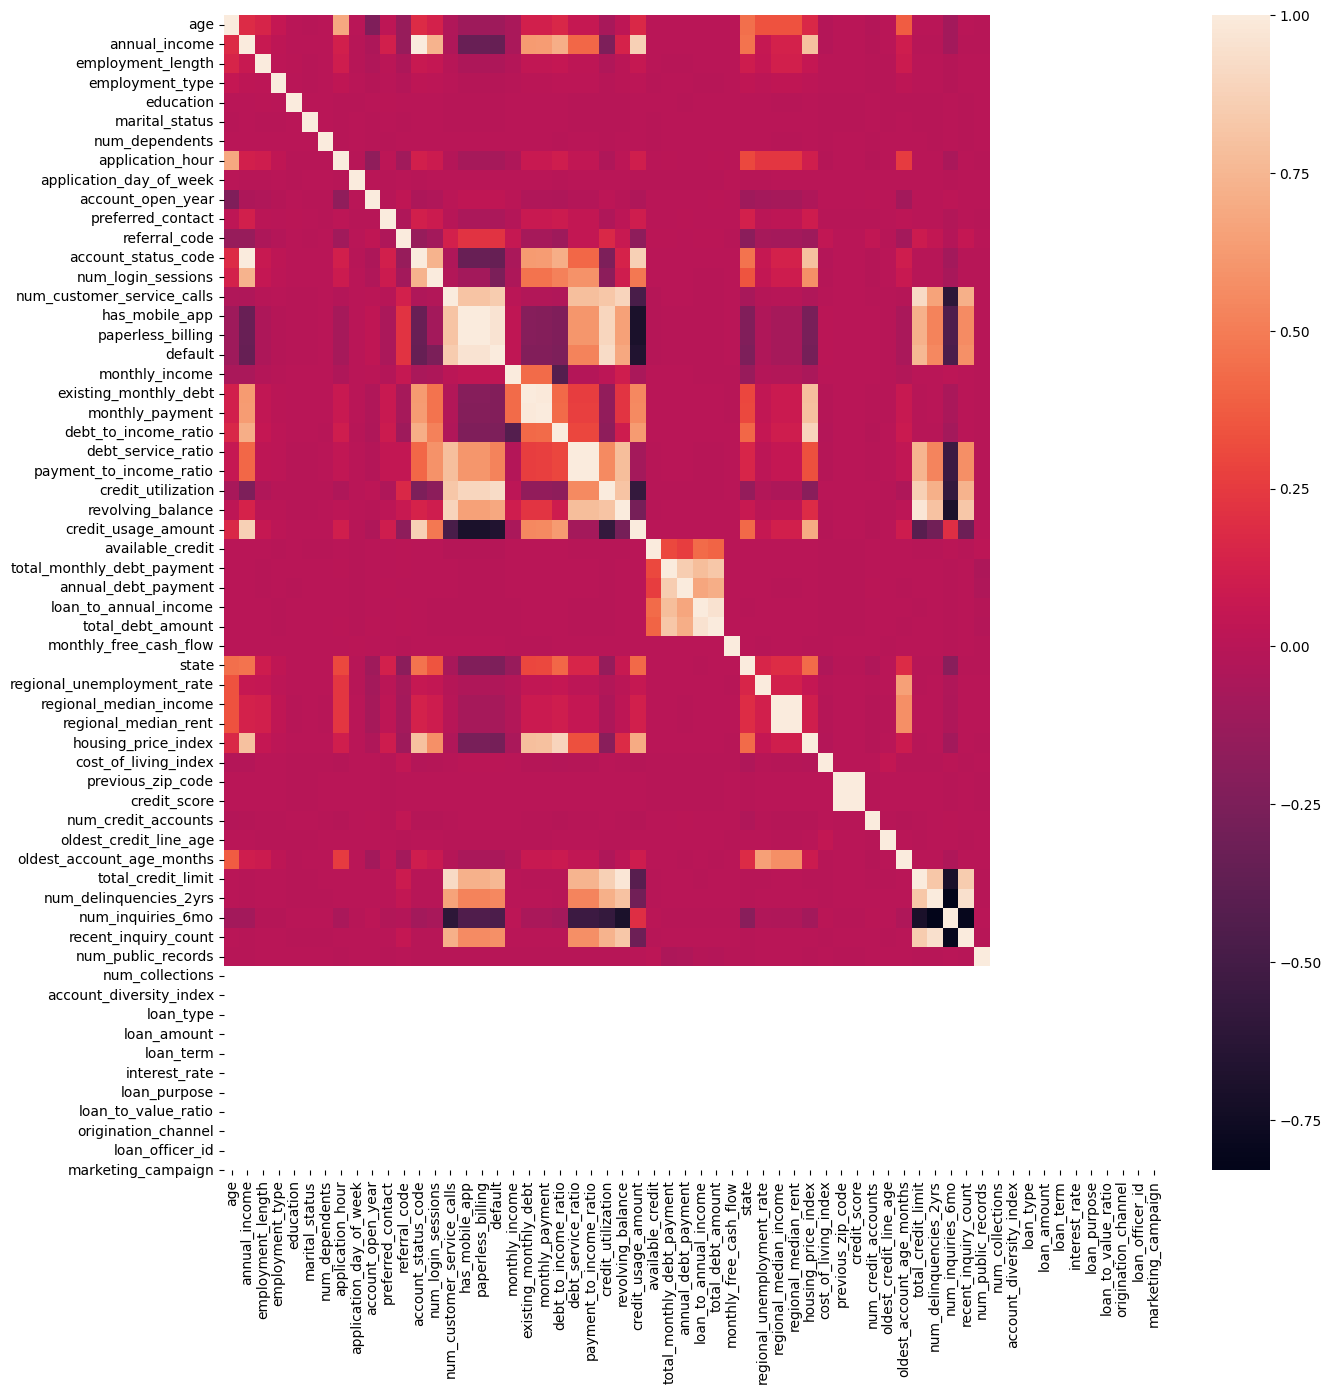

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(total_df.corr(), xticklabels=total_df.columns, yticklabels=total_df.columns)

In [44]:
total_df

age  annual_income  employment_length employment_type    education  \
0       41       61800.00               2.20              FT     Graduate   
1       38       28600.00               7.00              FT  High School   
2       18       20700.00               0.80              FT     Bachelor   
3       27       31400.00               4.80              FT     Bachelor   
4       26       24600.00               5.20              FT  High School   
...    ...            ...                ...             ...          ...   
89994   52       72300.00               3.70              FT     Bachelor   
89995   61       20000.00               4.20              FT  High School   
89996   19       20000.00               1.50              FT  High School   
89997   21       20000.00               3.50              FT  High School   
89998   36       25600.00               2.00              SE     Bachelor   

      marital_status  num_dependents  application_hour  \
0            Married               2                 5   
1            Married               0                 4   
2             Single               0                10   
3             Single               0                 7   
4             Single               0                 1   
...              ...             ...               ...   
89994         Single               1                13   
89995       Divorced               1                13   
89996        Married               3                 7   
89997        Married               1                 8   
89998        Married               3                15   

       application_day_of_week  account_open_year preferred_contact  \
0                            6               2013              Mail   
1                            2               2015             Phone   
2                            3               2020             Phone   
3                            5               2010             Email   
4                            2               2020              Mail   
...                        ...                ...               ...   
89994                        5               2016             Email   
89995                        5               2014              Mail   
89996                        5               2010              Mail   
89997                        3               2021             Email   
89998                        5               2022              Mail   

      referral_code account_status_code  random_noise_1  num_login_sessions  \
0           REF0000               ACT-2            1.14                  13   
1           REF0000               ACT-3           -0.16                   6   
2           REF0000               ACT-3            0.53                   1   
3           REF0000                 A01           -0.71                   4   
4           REF0000               ACT-3           -0.60                   6   
...             ...                 ...             ...                 ...   
89994       REF0000                 A01            1.63                  10   
89995       REF9754              ACTIVE           -0.50                  12   
89996       REF0000                 A01           -0.96                   4   
89997       REF0000               ACT-1            0.33                   5   
89998       REF0000              ACTIVE           -0.32                   5   

       num_customer_service_calls  has_mobile_app  paperless_billing  default  \
0                               2               1                  1        0   
1                               1               1                  1        1   
2                               2               1                  0        0   
3                               1               1                  1        0   
4                               2               1                  0        0   
...                           ...             ...                ...      ...   
89994           

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
tt_d = pd.get_dummies(total_df)

In [45]:
total_df['account_open_year'] = total_df['account_open_year'].astype('object')

In [47]:
total_df = total_df.drop(columns='random_noise_1')

In [240]:
total_df['interest_rate'].describe()

count   89999.000
mean       11.279
std         4.607
min         2.500
25%         6.960
50%        11.290
75%        14.820
max        22.800
Name: interest_rate, dtype: float64

In [245]:
np.quantile(total_df['annual_income'],0.80)

64800.0

In [250]:
tt = total_df.copy()

In [48]:
total_df['annual_income'] = np.where(total_df['annual_income']>np.quantile(total_df['annual_income'],0.80),np.quantile(total_df['annual_income'],0.80),total_df['annual_income'])

In [49]:
total_df['employment_length'].describe()

count   89999.00
mean        5.51
std         3.23
min         0.00
25%         3.00
50%         5.20
75%         7.60
max        23.90
Name: employment_length, dtype: float64

In [50]:
total_df['employment_length'] = np.where(total_df['employment_length']>np.quantile(total_df['employment_length'],0.80),np.quantile(total_df['employment_length'],0.80),total_df['employment_length'])

In [51]:
total_df['monthly_income'] = np.where(total_df['monthly_income']>np.quantile(total_df['monthly_income'],0.80),np.quantile(total_df['monthly_income'],0.80),total_df['monthly_income'])

In [257]:
total_df.describe()

age  annual_income  employment_length  num_dependents  \
count 89999.000      89999.000          89999.000       89999.000   
mean     38.715      42633.724              5.069           1.199   
std      10.805      16103.109              2.498           1.137   
min      18.000      20000.000              0.000           0.000   
25%      31.000      28100.000              3.000           0.000   
50%      38.000      41100.000              5.200           1.000   
75%      46.000      59300.000              7.600           2.000   
max      74.000      64800.000              8.200           5.000   

       application_hour  application_day_of_week  num_login_sessions  \
count         89999.000                89999.000           89999.000   
mean             11.476                    2.994               8.814   
std               6.901                    2.006               3.823   
min               0.000                    0.000               1.000   
25%               6.000                    1.000               6.000   
50%              11.000                    3.000               8.000   
75%              17.000                    5.000              11.000   
max              23.000                    6.000              34.000   

       num_customer_service_calls  has_mobile_app  paperless_billing  \
count                   89999.000       89999.000          89999.000   
mean                        1.995           0.713              0.620   
std                         1.413           0.452              0.485   
min                         0.000           0.000              0.000   
25%                         1.000           0.000              0.000   
50%                         2.000           1.000              1.000   
75%                         3.000           1.000              1.000   
max                        11.000           1.000              1.000   

        default  monthly_income  existing_monthly_debt  monthly_payment  \
count 89999.000       89999.000              89999.000        89999.000   
mean      0.051        3552.821                894.137          927.724   
std       0.220        1341.911                679.001          892.264   
min       0.000        1666.670                 83.360           15.000   
25%       0.000        2341.670                424.475          294.000   
50%       0.000        3425.000                706.150          565.940   
75%       0.000        4941.670               1168.840         1325.955   
max       1.000        5400.000               9229.850         7542.690   

       debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
count             89999.000           89999.000                89999.000   
mean                  0.531               0.531                    0.306   
std                   0.380               0.380                    0.366   
min                   0.054               0.054                    0.002   
25%                   0.296               0.296                    0.077   
50%                   0.424               0.424                    0.169   
75%                   0.628               0.628                    0.384   
max                   4.630               4.630                    4.526   

       credit_utilization  revolving_balance  credit_usage_amount  \
count           89999.000          89999.000            89999.000   
mean                0.441          39404.215            39557.126   
std                 0.184          34522.296            34753.793   
min                 0.013            804.300              804.300   
25%                 0.306          16731.600            16549.900   
50%                 0.434          29294.700            29280.400   
75%                 0.566          50465.400            50936.600   
max                 1.000         442616.200           442616.200   

       available_credit  total_monthly_debt_payment  annual_debt_payment  \
count         89999.000          

In [52]:
total_df.drop(columns='previous_zip_code', inplace=True)

In [54]:
total_df.to_csv(r'D:\TrashFolder\cbu_code\total_df.csv')

In [272]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

def cv_column_score(X, y, col, n_splits=5):
    """
    Обучает CatBoost только на одном столбце
    и считает средний roc_auc по cross-val.
    Автоматически определяет, является ли столбец категориальным.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # определяем тип признака
    is_cat = X[col].dtype == "object" or str(X[col].dtype).startswith("category")

    scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train = X.iloc[train_idx][[col]]
        X_val   = X.iloc[val_idx][[col]]
        y_train = y.iloc[train_idx]
        y_val   = y.iloc[val_idx]

        model = CatBoostClassifier(
            depth=6,
            learning_rate=0.05,
            iterations=400,
            verbose=False,
            loss_function="Logloss"
        )

        model.fit(
            X_train,
            y_train,
            cat_features=[0] if is_cat else None   # <-- ВАЖНО
        )

        preds = model.predict_proba(X_val)[:, 1]
        score = roc_auc_score(y_val, preds)
        scores.append(score)

    return np.mean(scores), np.std(scores)

In [273]:
results = []
X = total_df.drop(columns='default')
y = total_df['default']

for col in X.columns:
    mean_score, std_score = cv_column_score(X, y, col)
    results.append((col, mean_score, std_score))
    print(col)
    
df_fi = pd.DataFrame(results, columns=["feature", "roc_auc_mean", "roc_auc_std"])
df_fi = df_fi.sort_values("roc_auc_mean", ascending=False)

print(df_fi)

age
annual_income
employment_length
employment_type
education
marital_status
num_dependents
application_hour
application_day_of_week
account_open_year
preferred_contact
referral_code
account_status_code
num_login_sessions
num_customer_service_calls
has_mobile_app
paperless_billing
monthly_income
existing_monthly_debt
monthly_payment
debt_to_income_ratio
debt_service_ratio
payment_to_income_ratio
credit_utilization
revolving_balance
credit_usage_amount
available_credit
total_monthly_debt_payment
annual_debt_payment
loan_to_annual_income
total_debt_amount
monthly_free_cash_flow
state
regional_unemployment_rate
regional_median_income
regional_median_rent
housing_price_index
cost_of_living_index
credit_score
num_credit_accounts
oldest_credit_line_age
oldest_account_age_months
total_credit_limit
num_delinquencies_2yrs
num_inquiries_6mo
recent_inquiry_count
num_public_records
num_collections
account_diversity_index
loan_type
loan_amount
loan_term
interest_rate
loan_purpose
loan_to_value_rati

In [271]:
total_df['employment_type'].value_counts()

FT          63017
SE          13436
PT           9007
Contract     4539
Name: employment_type, dtype: int64

In [280]:
df_fi['idx'] = list(range(1,59))

In [55]:
df_fi = pd.read_excel(r'D:\TrashFolder\cbu_code\feature_importance.xlsx')

In [56]:
df_fi

feature  roc_auc_mean  roc_auc_std  idx
0       monthly_free_cash_flow          0.74         0.01    1
1                 credit_score          0.73         0.01    2
2                annual_income          0.73         0.01    3
3               monthly_income          0.73         0.01    4
4        loan_to_annual_income          0.70         0.01    5
5                          age          0.69         0.01    6
6         debt_to_income_ratio          0.69         0.00    7
7           debt_service_ratio          0.69         0.00    8
8      payment_to_income_ratio          0.69         0.01    9
9             available_credit          0.68         0.01   10
10          total_credit_limit          0.67         0.01   11
11               interest_rate          0.65         0.01   12
12   oldest_account_age_months          0.65         0.01   13
13      oldest_credit_line_age          0.65         0.01   14
14          num_login_sessions          0.64         0.01   15
15       existing_monthly_debt          0.63         0.01   16
16                   education          0.62         0.01   17
17             monthly_payment          0.62         0.01   18
18                 loan_amount          0.61         0.01   19
19           revolving_balance          0.60         0.01   20
20         credit_usage_amount          0.60         0.01   21
21     account_diversity_index          0.60         0.01   22
22           total_debt_amount          0.60         0.01   23
23         num_credit_accounts          0.59         0.02   24
24                   loan_term          0.59         0.00   25
25                loan_purpose          0.58         0.00   26
26              marital_status          0.57         0.00   27
27          credit_utilization          0.56         0.01   28
28           employment_length          0.56         0.01   29
29         annual_debt_payment          0.55         0.01   30
30  total_monthly_debt_payment          0.55         0.01   31
31         loan_to_value_ratio          0.55         0.00   32
32           paperless_billing          0.54         0.01   33
33                   loan_type          0.54         0.03   34
34              has_mobile_app          0.53         0.01   35
35          num_public_records          0.52         0.00   36
36              num_dependents          0.52         0.01   37
37      regional_median_income          0.52         0.01   38
38      num_delinquencies_2yrs          0.51         0.00   39
39             employment_type          0.51         0.00   40
40  regional_unemployment_rate          0.51         0.01   41
41        regional_median_rent          0.51         0.01   42
42         origination_channel          0.51         0.01   43
43     application_day_of_week          0.51         0.01   44
44                       state          0.51         0.00   45
45        recent_inquiry_count          0.51         0.00   46
46           num_inquiries_6mo          0.51         0.00   47
47        cost_of_living_index          0.50         0.01   48
48           preferred_contact          0.50         0.00   49
49         housing_price_index          0.50         0.01   50
50         account_status_code          0.50         0.00   51
51           account_open_year          0.50         0.00   52
52          marketing_campaign          0.50         0.00   53
53               referral_code          0.50         0.00   54
54             num_collections          0.50         0.00   55
55            application_hour          0.50         0.01   56
56  num_customer_service_calls          0.49         0.01   57
57             loan_officer_id          0.49         0.01   58

In [291]:
df_fi = pd.read_

feature  roc_auc_mean  roc_auc_std  idx
31      monthly_free_cash_flow         0.741        0.006    1
38                credit_score         0.733        0.006    2
1                annual_income         0.726        0.009    3
17              monthly_income         0.726        0.009    4
29       loan_to_annual_income         0.702        0.007    5
0                          age         0.694        0.008    6
20        debt_to_income_ratio         0.694        0.003    7
21          debt_service_ratio         0.693        0.003    8
22     payment_to_income_ratio         0.691        0.006    9
26            available_credit         0.679        0.005   10
42          total_credit_limit         0.674        0.010   11
52               interest_rate         0.652        0.010   12
41   oldest_account_age_months         0.647        0.006   13
40      oldest_credit_line_age         0.647        0.006   14
13          num_login_sessions         0.643        0.008   15
18       existing_monthly_debt         0.631        0.010   16
4                    education         0.623        0.008   17
19             monthly_payment         0.622        0.008   18
50                 loan_amount         0.608        0.007   19
24           revolving_balance         0.605        0.010   20
25         credit_usage_amount         0.605        0.011   21
48     account_diversity_index         0.599        0.015   22
30           total_debt_amount         0.597        0.006   23
39         num_credit_accounts         0.588        0.016   24
51                   loan_term         0.587        0.004   25
53                loan_purpose         0.579        0.004   26
5               marital_status         0.572        0.004   27
23          credit_utilization         0.563        0.006   28
2            employment_length         0.557        0.010   29
28         annual_debt_payment         0.553        0.006   30
27  total_monthly_debt_payment         0.553        0.006   31
54         loan_to_value_ratio         0.548        0.004   32
16           paperless_billing         0.542        0.006   33
49                   loan_type         0.538        0.029   34
15              has_mobile_app         0.533        0.005   35
46          num_public_records         0.522        0.003   36
6               num_dependents         0.520        0.007   37
34      regional_median_income         0.515        0.006   38
43      num_delinquencies_2yrs         0.512        0.003   39
3              employment_type         0.508        0.004   40
33  regional_unemployment_rate         0.508        0.008   41
35        regional_median_rent         0.507        0.007   42
55         origination_channel         0.506        0.008   43
8      application_day_of_week         0.506        0.012   44
32                       state         0.505        0.003   45
45        recent_inquiry_count         0.505        0.003   46
44           num_inquiries_6mo         0.505        0.003   47
37        cost_of_living_index         0.503        0.014   48
10           preferred_contact         0.502        0.003   49
36         housing_price_index         0.502        0.010   50
12         account_status_code         0.500        0.000   51
9            account_open_year         0.500        0.000   52
57          marketing_campaign         0.499        0.002   53
11               referral_code         0.498        0.004   54
47             num_collections         0.497        0.001   55
7             application_hour         0.497        0.009   56
14  num_customer_service_calls         0.494        0.006   57
56             loan_officer_id         0.491        0.010   58

In [57]:
X_train = total_df[df_fi[df_fi['idx']<=30]['feature'].to_list()]

In [58]:
X_train.describe()

monthly_free_cash_flow  credit_score  annual_income  monthly_income  \
count                89999.00      89999.00       89999.00        89999.00   
mean                  2143.70        716.28       42633.72         3552.82   
std                   2025.97         46.08       16103.11         1341.91   
min                  -6050.80        534.00       20000.00         1666.67   
25%                    944.00        685.00       28100.00         2341.67   
50%                   1845.90        717.00       41100.00         3425.00   
75%                   3109.91        748.00       59300.00         4941.67   
max                  29793.93        850.00       64800.00         5400.00   

       loan_to_annual_income      age  debt_to_income_ratio  \
count               89999.00 89999.00              89999.00   
mean                    2.87    38.72                  0.53   
std                     4.62    10.81                  0.38   
min                     0.00    18.00                  0.05   
25%                     0.22    31.00                  0.30   
50%                     0.51    38.00                  0.42   
75%                     3.99    46.00                  0.63   
max                    38.13    74.00                  4.63   

       debt_service_ratio  payment_to_income_ratio  available_credit  \
count            89999.00                 89999.00          89999.00   
mean                 0.53                     0.31          51926.30   
std                  0.38                     0.37          45396.04   
min                  0.05                     0.00              0.00   
25%                  0.30                     0.08          21960.40   
50%                  0.42                     0.17          38648.40   
75%                  0.63                     0.38          66798.40   
max                  4.63                     4.53         483500.00   

       total_credit_limit  interest_rate  oldest_account_age_months  \
count            89999.00       89999.00                   89999.00   
mean             91483.42          11.28                     112.13   
std              67988.31           4.61                      61.34   
min              10000.00           2.50                       0.00   
25%              45100.00           6.96                      64.80   
50%              72300.00          11.29                     108.00   
75%             117800.00          14.82                     154.80   
max             500000.00          22.80                     386.40   

       oldest_credit_line_age  num_login_sessions  existing_monthly_debt  \
count                89999.00            89999.00               89999.00   
mean                     9.34                8.81                 894.14   
std                      5.11                3.82                 679.00   
min                      0.00                1.00                  83.36   
25%                      5.40                6.00                 424.48   
50%                      9.00                8.00                 706.15   
75%                     12.90               11.00                1168.84   
max                     32.20               34.00                9229.85   

       monthly_payment  loan_amount  revolving_balance  credit_usage_amount  \
count         89999.00     89999.00           89999.00             89999.00   
mean            927.72    105977.99           39404.22             39557.13   
std             892.26    147111.30           34522.30             34753.79   
min              15.00       500.00             804.30               804.30   
25%             294.00      9800.00           16731.60             16549.90   
50%             565.94     19200.00           29294.70             29280.40   
75%            1325.95    192800.00           50465.40             50936.60   
max            7542.69    841300.00          442616.20            442616.20   

       account_diversity_index  total_debt_amount 

In [289]:
X_train['monthly_free_cash_flow'].value_counts()

1320.560    4
2104.480    4
1254.060    4
1693.410    4
2197.210    4
           ..
3610.230    1
2701.550    1
-544.960    1
2430.800    1
-793.660    1
Name: monthly_free_cash_flow, Length: 86046, dtype: int64

In [290]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   monthly_free_cash_flow     89999 non-null  float64
 1   credit_score               89999 non-null  int64  
 2   annual_income              89999 non-null  float64
 3   monthly_income             89999 non-null  float64
 4   loan_to_annual_income      89999 non-null  float64
 5   age                        89999 non-null  int64  
 6   debt_to_income_ratio       89999 non-null  float64
 7   debt_service_ratio         89999 non-null  float64
 8   payment_to_income_ratio    89999 non-null  float64
 9   available_credit           89999 non-null  float64
 10  total_credit_limit         89999 non-null  float64
 11  interest_rate              89999 non-null  float64
 12  oldest_account_age_months  89999 non-null  float64
 13  oldest_credit_line_age     89999 non-null  flo

In [59]:
log_list = ['annual_income','monthly_income','available_credit','total_credit_limit','oldest_account_age_months','existing_monthly_debt','monthly_payment','loan_amount','revolving_balance','credit_usage_amount','total_debt_amount','annual_debt_payment']

In [60]:
for col in log_list:
    X_train[col] = np.log(X_train[col]+0.001)

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\522716765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.log(X_train[col]+0.001)


In [61]:
for col in X_train.columns:
    if X_train[col].dtype in ('float64','int64'):
        X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\483486107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()


In [62]:
X_train_2 = pd.get_dummies(X_train)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
y = total_df['default']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_train_2,y,test_size=0.3, random_state=100,stratify=y)

In [73]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(
    solver="liblinear",      # лучший для небольших датасетов
    penalty="l2",
    max_iter=1000
)


cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

print("ROC-AUC scores:", scores)
print("Mean ROC-AUC:", scores.mean())
print("STD:", scores.std())


ROC-AUC scores: [0.78324897 0.80325339 0.80855531 0.80316037 0.81323445]
Mean ROC-AUC: 0.8022904978315296
STD: 0.010230167017972703


In [78]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [76]:
scores.std()

0.010230167017972703

In [98]:
model = LogisticRegression(max_iter=2000)

param_grid = {
    "C": [0.01, 0.1, 1, 5],
    "solver": ["liblinear", "lbfgs"]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)

grid.fit(X_train, y_train)   # <-- после этого модель обучена!

print("Best params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

best_model = grid.best_estimator_

Best params: {'C': 1, 'solver': 'lbfgs'}
Best ROC-AUC: 0.8023985511857111


In [101]:
print(roc_auc_score(y_train, best_model.predict_proba(X_train)[:,1]))

0.8044442065054017


In [87]:
best_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
roc_auc_score(y_test, best_model.predict(X_test))

0.5183721321220346

In [92]:
from catboost import CatBoostClassifier

In [93]:
model = CatBoostClassifier(
            depth=6,
            learning_rate=0.05,
            iterations=400,
            verbose=False,
            loss_function="Logloss"
        )

In [94]:

model.fit(X_train, y_train)   # <-- после этого модель обучена!

print("Best params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

Best params: {'C': 1, 'solver': 'lbfgs'}
Best ROC-AUC: 0.8023985511857111


In [97]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.7882505611616648

In [96]:
X_train

monthly_free_cash_flow  credit_score  annual_income  monthly_income  \
1700                    -0.53         -1.92          -0.96           -0.96   
36158                   -1.64          0.73          -1.13           -1.13   
3406                    -0.69          0.25          -1.66           -1.66   
62871                   -0.15         -0.94          -0.62           -0.62   
88293                   -0.16          1.27          -0.50           -0.50   
...                       ...           ...            ...             ...   
13810                   -0.32          0.10          -0.59           -0.59   
36256                   -0.49         -0.90          -1.66           -1.66   
1803                    -0.12         -0.72           0.10            0.10   
15767                    2.09         -0.01           1.22            1.22   
57680                   -1.57          0.23          -1.66           -1.66   

       loan_to_annual_income   age  debt_to_income_ratio  debt_service_ratio  \
1700                   -0.39 -1.27                 -0.03               -0.03   
36158                   3.51  1.14                  2.73                2.73   
3406                   -0.47  0.49                  0.06                0.06   
62871                  -0.54 -0.81                 -0.67               -0.67   
88293                  -0.49  0.49                 -0.55               -0.55   
...                      ...   ...                   ...                 ...   
13810                  -0.52 -0.90                 -0.30               -0.30   
36256                  -0.47  0.12                 -0.57               -0.57   
1803                   -0.54 -0.34                 -0.22               -0.22   
15767                  -0.59  0.58                 -0.41               -0.41   
57680                   3.31  1.41                  2.89                2.89   

       payment_to_income_ratio  available_credit  total_credit_limit  \
1700                      0.12             -0.76               -0.92   
36158                     2.46             -0.41                0.12   
3406                     -0.06             -0.08               -0.66   
62871                    -0.51             -0.32               -0.71   
88293                    -0.32              0.53                0.50   
...                        ...               ...                 ...   
13810                    -0.09             -0.81               -1.58   
36256                    -0.16             -0.43               -0.29   
1803                     -0.44             -0.38               -1.04   
15767                    -0.69              1.61                2.04   
57680                     2.96             -1.50               -2.03   

       interest_rate  oldest_account_age_months  oldest_credit_line_age  \
1700            0.44                      -0.00                   -0.50   
36158          -1.40                       0.60                    1.22   
3406            0.21                       0.80                    2.18   
62871           0.48                       0.38                    0.44   
88293          -0.16                       0.45                    0.66   
...              ...                        ...                     ...   
13810           0.33                       0.35                    0.32   
36256           1.85                       0.79                    2.16   
1803            0.26                       0.52                    0.91   
15767           0.12                       0.11                   -0.28   
57680          -1.02                      -0.20                   -0.81   

       num_login_sessions  existing_monthly_debt  monthly_payment  \
1700                -1.26                  -0.82             0.28   
36158                1.62                   0.10             1.42   
3406                 0.57                  -0.58            -0.20   
62871               -1.26                  -0.75            -0.62  

In [102]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# X, y — твой датасет
# X = ...
# y = ...

# Стратифицированный KFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Модель
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Сетка гиперпараметров
param_grid = {
    'rf__n_estimators': [200, 400, 600],
    'rf__max_depth': [None, 5, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2']
}

In [104]:
pipeline = Pipeline([
    ('rf', rf)
])
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=make_scorer(roc_auc_score, needs_proba=True),
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Обучение
grid.fit(X_train, y_train)

# Лучшие параметры
print("Best params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [111]:
# Модель случайного леса
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

# Стратифицированная кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ROC-AUC по кросс-валидации
scores = cross_val_score(
    rf, X_train, y_train,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

print("ROC-AUC по фолдам:", scores)
print("Средний ROC-AUC:", scores.mean())

ROC-AUC по фолдам: [0.76803361 0.79138596 0.80882481 0.7973083  0.80873571]
Средний ROC-AUC: 0.7948576767186054


In [114]:
df_fi

feature  roc_auc_mean  roc_auc_std  idx
0       monthly_free_cash_flow          0.74         0.01    1
1                 credit_score          0.73         0.01    2
2                annual_income          0.73         0.01    3
3               monthly_income          0.73         0.01    4
4        loan_to_annual_income          0.70         0.01    5
5                          age          0.69         0.01    6
6         debt_to_income_ratio          0.69         0.00    7
7           debt_service_ratio          0.69         0.00    8
8      payment_to_income_ratio          0.69         0.01    9
9             available_credit          0.68         0.01   10
10          total_credit_limit          0.67         0.01   11
11               interest_rate          0.65         0.01   12
12   oldest_account_age_months          0.65         0.01   13
13      oldest_credit_line_age          0.65         0.01   14
14          num_login_sessions          0.64         0.01   15
15       existing_monthly_debt          0.63         0.01   16
16                   education          0.62         0.01   17
17             monthly_payment          0.62         0.01   18
18                 loan_amount          0.61         0.01   19
19           revolving_balance          0.60         0.01   20
20         credit_usage_amount          0.60         0.01   21
21     account_diversity_index          0.60         0.01   22
22           total_debt_amount          0.60         0.01   23
23         num_credit_accounts          0.59         0.02   24
24                   loan_term          0.59         0.00   25
25                loan_purpose          0.58         0.00   26
26              marital_status          0.57         0.00   27
27          credit_utilization          0.56         0.01   28
28           employment_length          0.56         0.01   29
29         annual_debt_payment          0.55         0.01   30
30  total_monthly_debt_payment          0.55         0.01   31
31         loan_to_value_ratio          0.55         0.00   32
32           paperless_billing          0.54         0.01   33
33                   loan_type          0.54         0.03   34
34              has_mobile_app          0.53         0.01   35
35          num_public_records          0.52         0.00   36
36              num_dependents          0.52         0.01   37
37      regional_median_income          0.52         0.01   38
38      num_delinquencies_2yrs          0.51         0.00   39
39             employment_type          0.51         0.00   40
40  regional_unemployment_rate          0.51         0.01   41
41        regional_median_rent          0.51         0.01   42
42         origination_channel          0.51         0.01   43
43     application_day_of_week          0.51         0.01   44
44                       state          0.51         0.00   45
45        recent_inquiry_count          0.51         0.00   46
46           num_inquiries_6mo          0.51         0.00   47
47        cost_of_living_index          0.50         0.01   48
48           preferred_contact          0.50         0.00   49
49         housing_price_index          0.50         0.01   50
50         account_status_code          0.50         0.00   51
51           account_open_year          0.50         0.00   52
52          marketing_campaign          0.50         0.00   53
53               referral_code          0.50         0.00   54
54             num_collections          0.50         0.00   55
55            application_hour          0.50         0.01   56
56  num_customer_service_calls          0.49         0.01   57
57             loan_officer_id          0.49         0.01   58

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\1334522522.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(total_df.corr())


<Axes: >

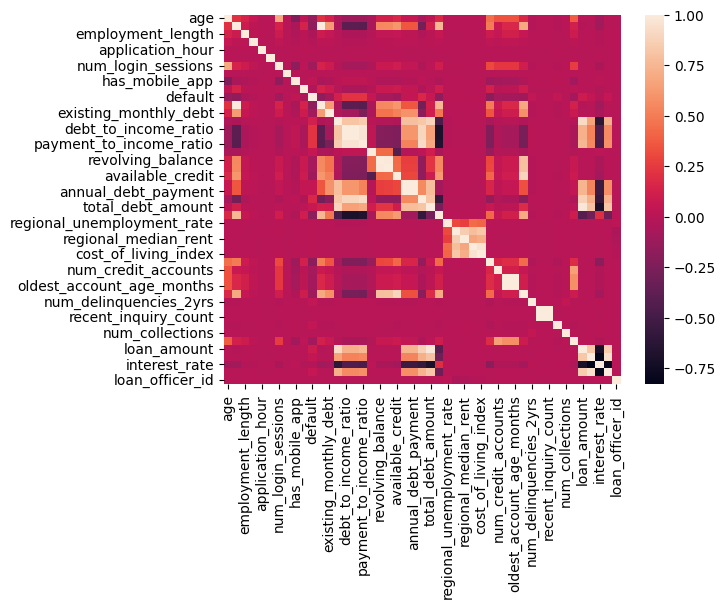

In [119]:
sns.heatmap(total_df.corr())

In [126]:
X = total_df[df_fi[df_fi['idx']<=23]['feature'].to_list()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   monthly_free_cash_flow     89999 non-null  float64
 1   credit_score               89999 non-null  int64  
 2   annual_income              89999 non-null  float64
 3   monthly_income             89999 non-null  float64
 4   loan_to_annual_income      89999 non-null  float64
 5   age                        89999 non-null  int64  
 6   debt_to_income_ratio       89999 non-null  float64
 7   debt_service_ratio         89999 non-null  float64
 8   payment_to_income_ratio    89999 non-null  float64
 9   available_credit           89999 non-null  float64
 10  total_credit_limit         89999 non-null  float64
 11  interest_rate              89999 non-null  float64
 12  oldest_account_age_months  89999 non-null  float64
 13  oldest_credit_line_age     89999 non-null  flo

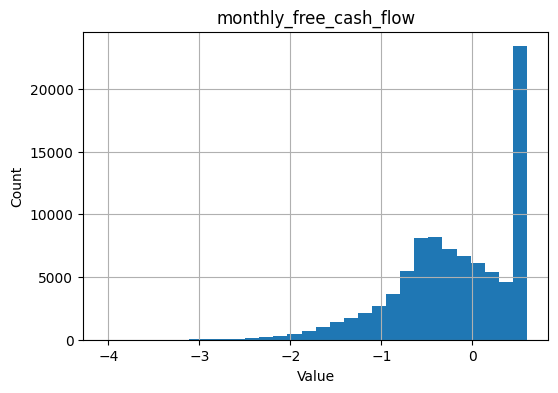

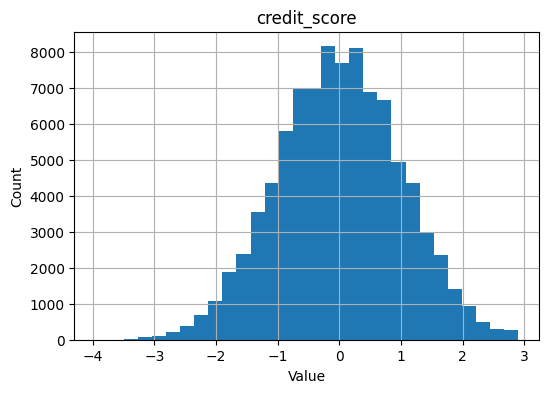

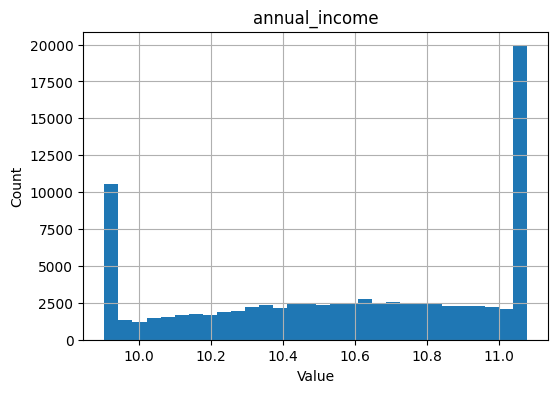

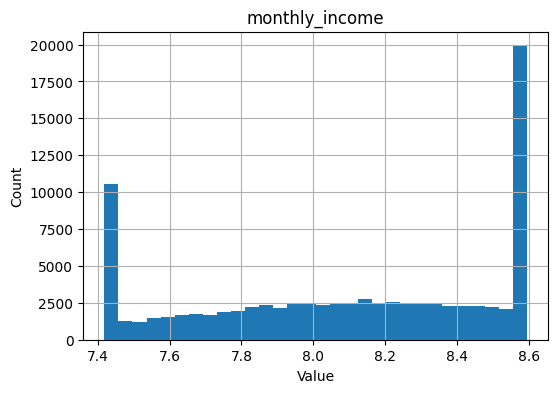

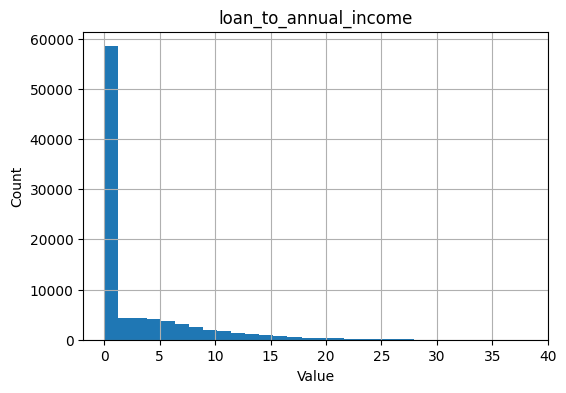

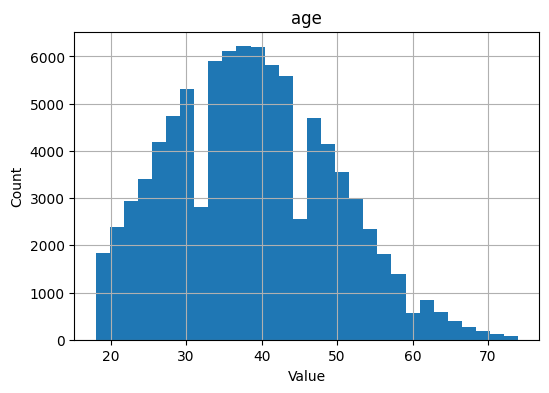

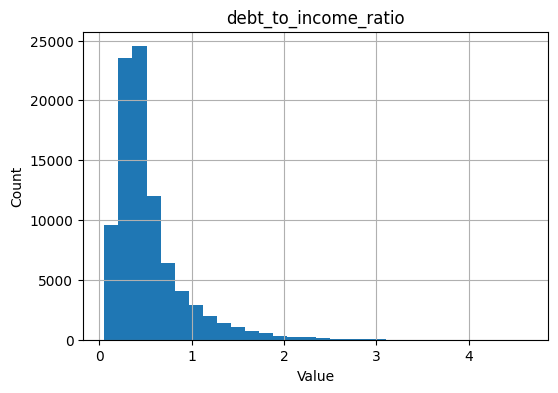

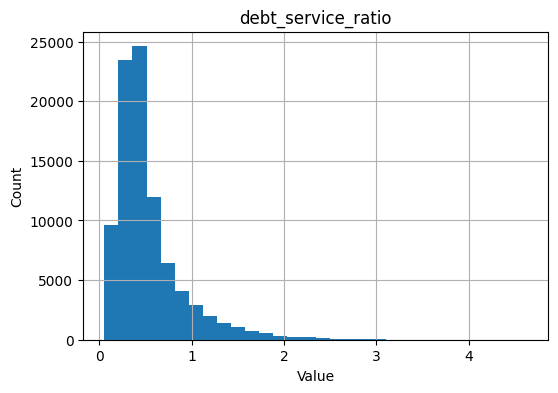

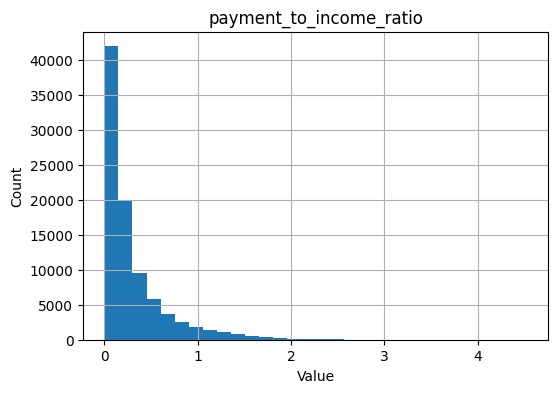

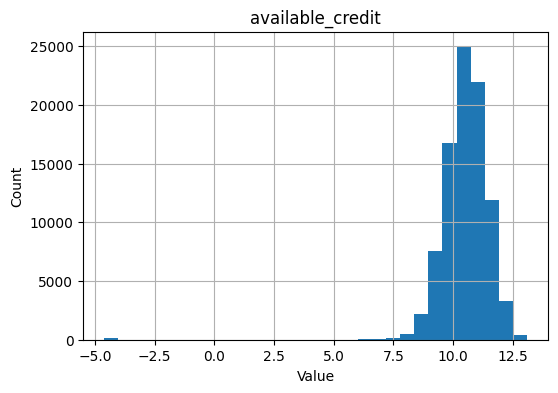

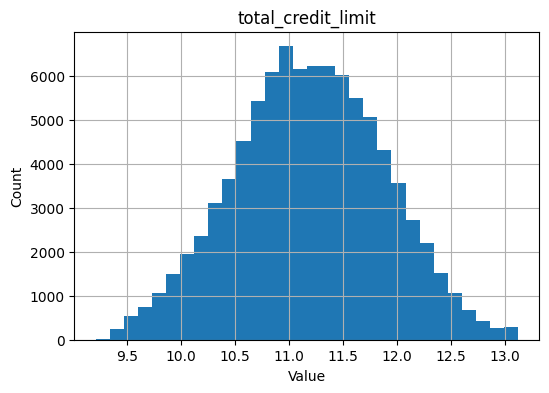

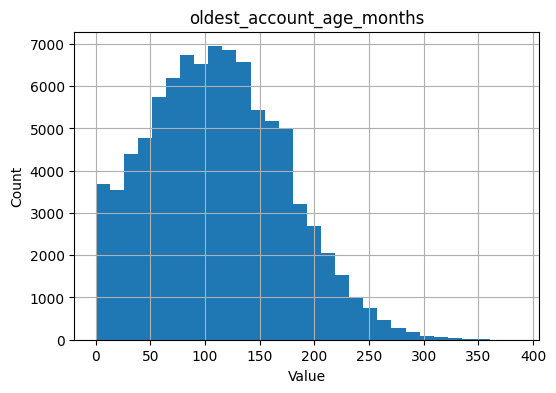

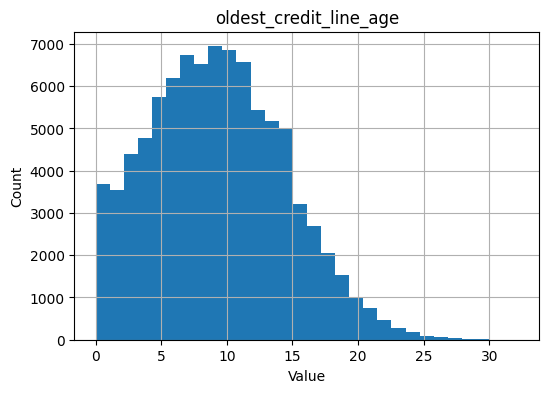

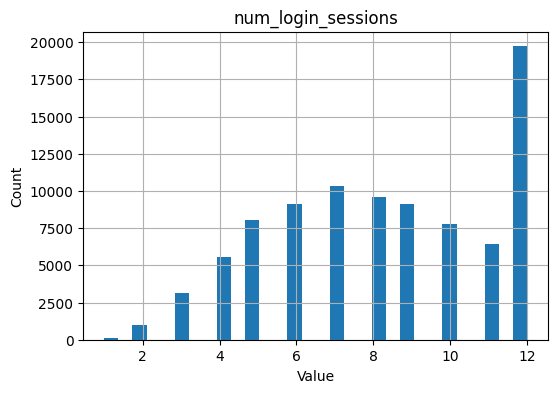

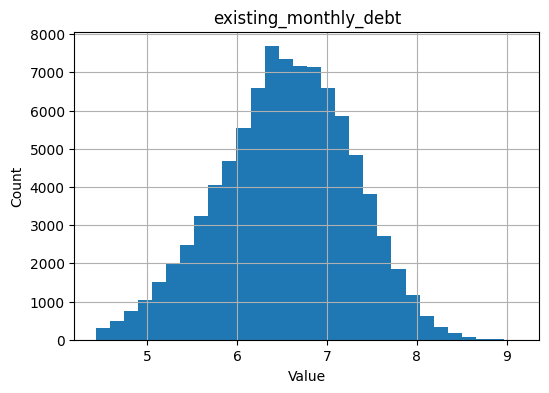

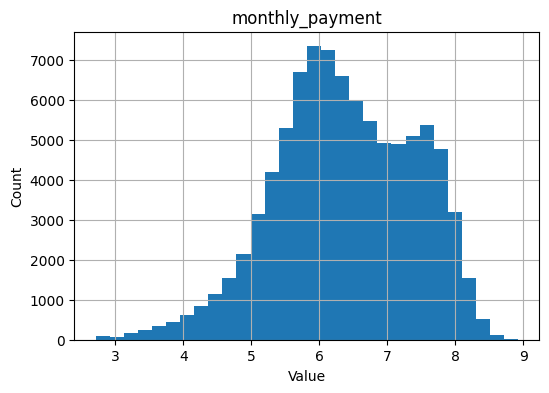

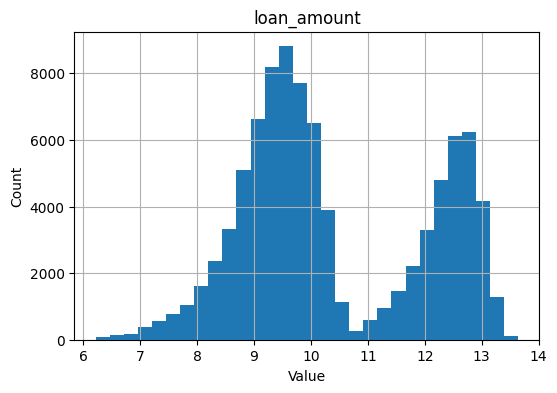

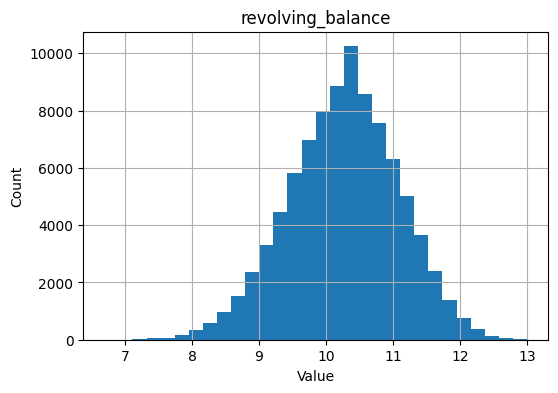

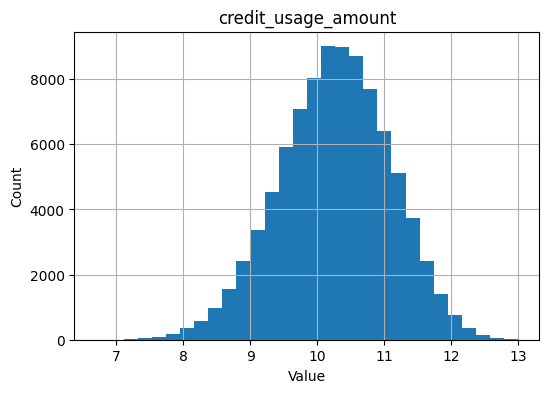

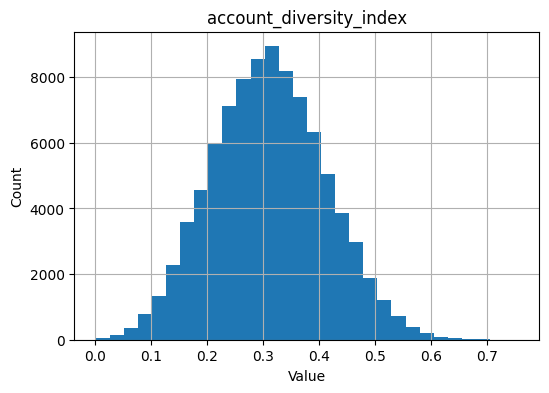

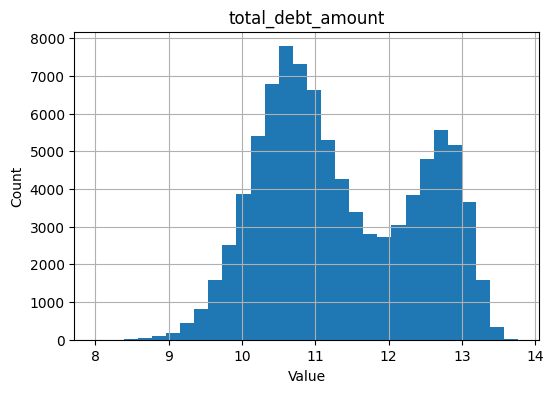

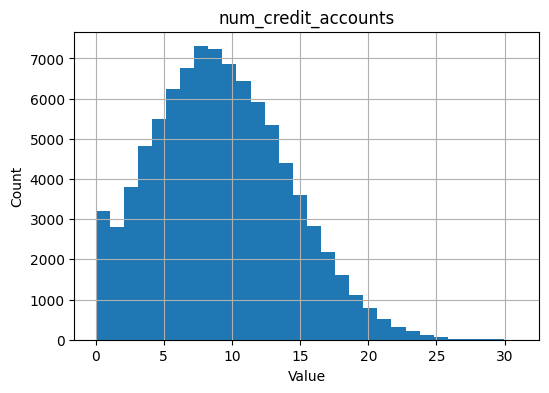

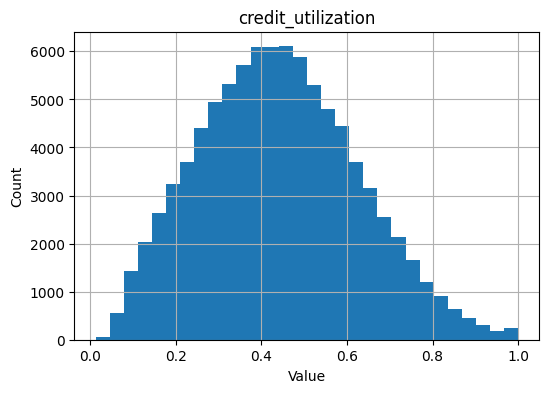

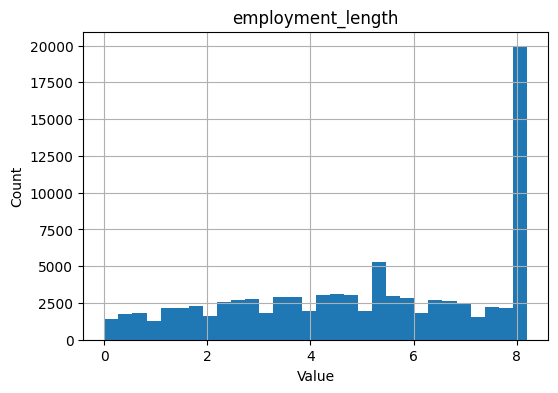

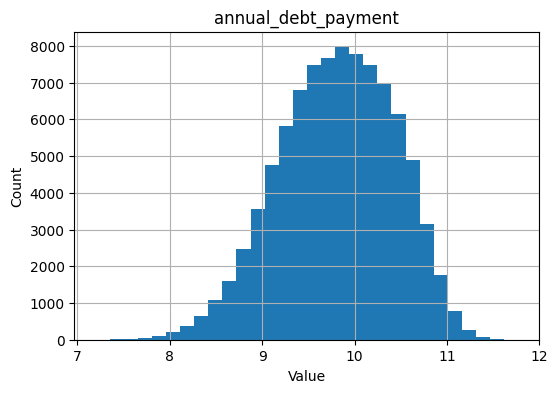

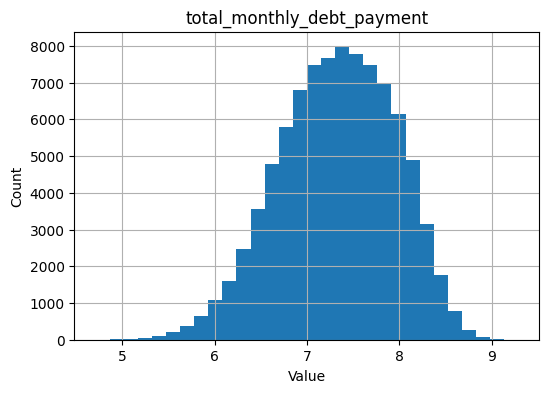

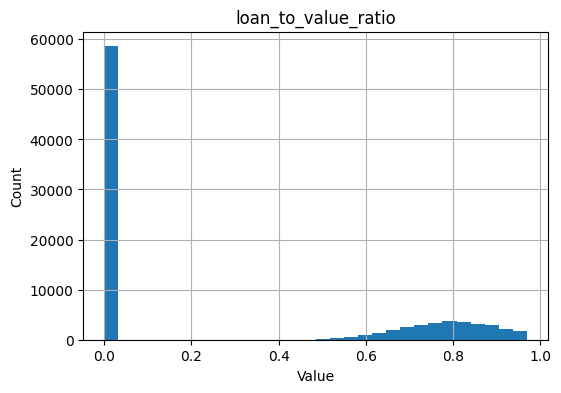

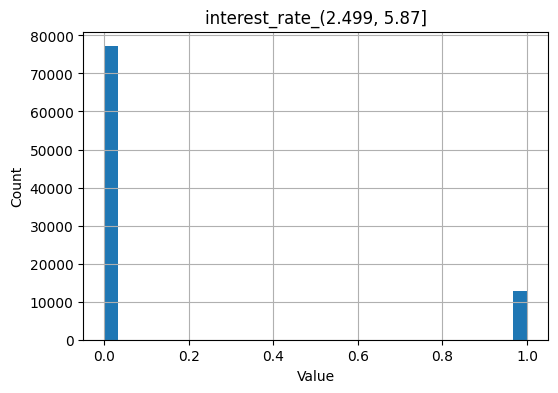

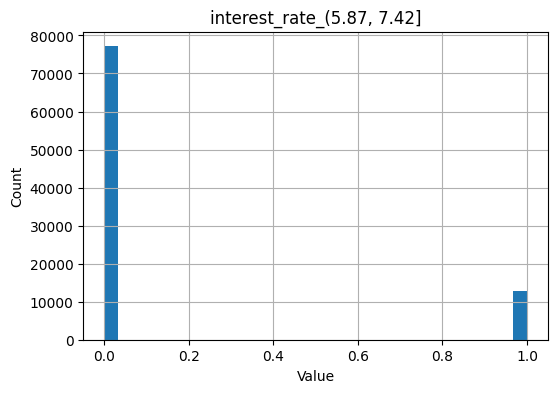

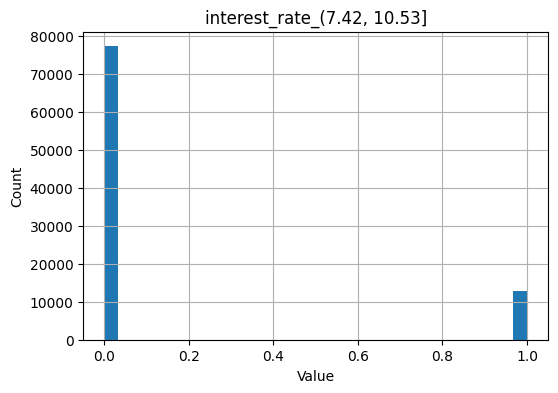

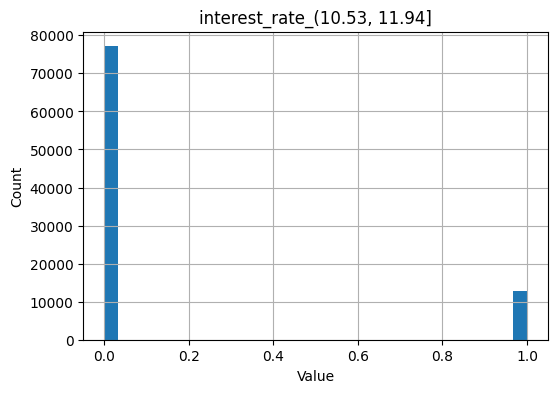

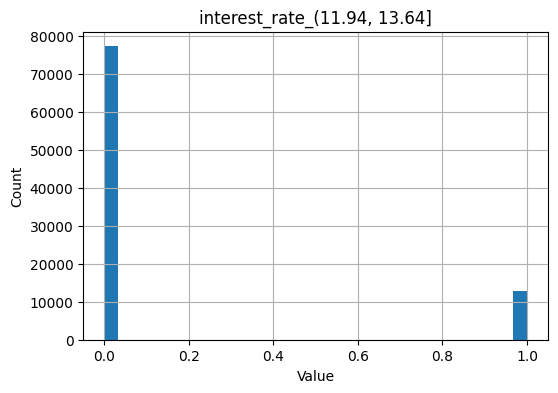

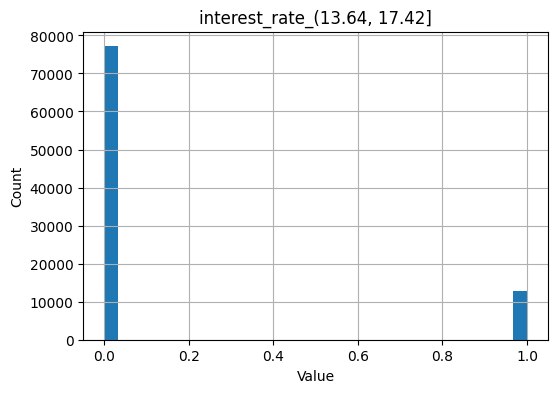

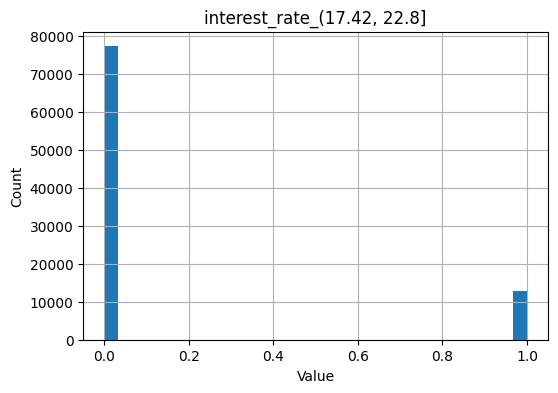

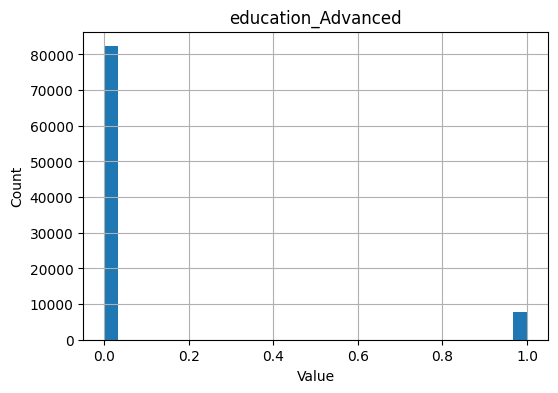

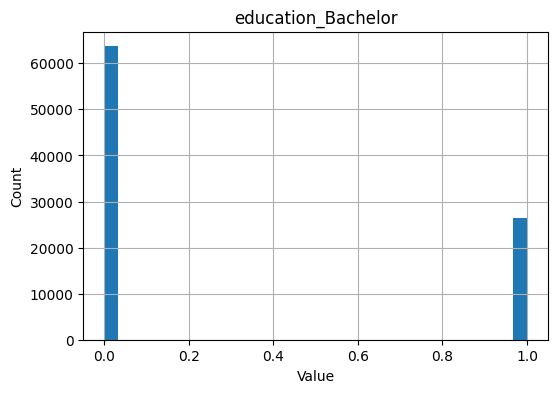

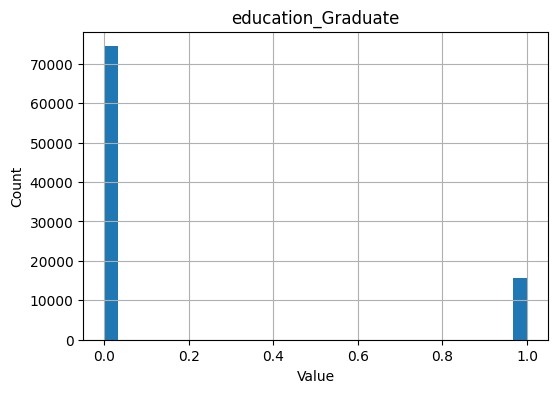

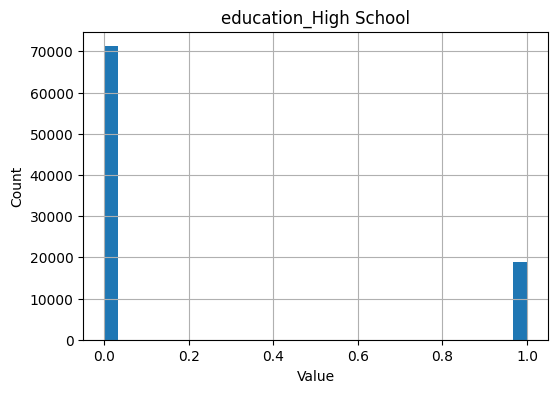

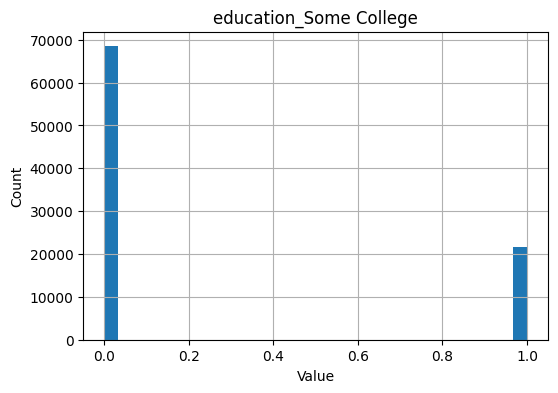

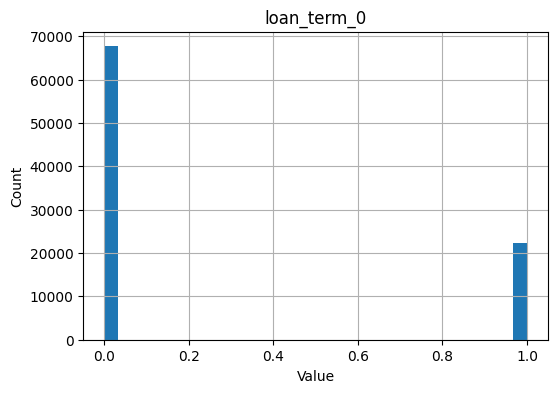

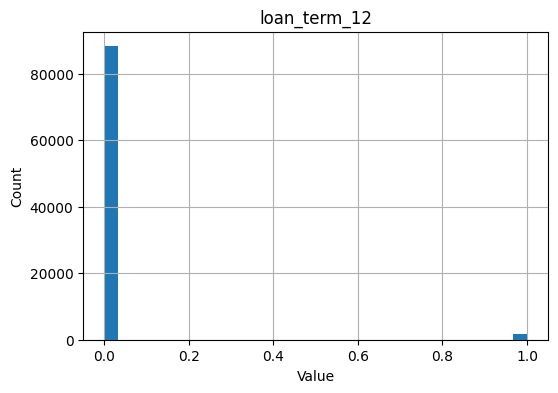

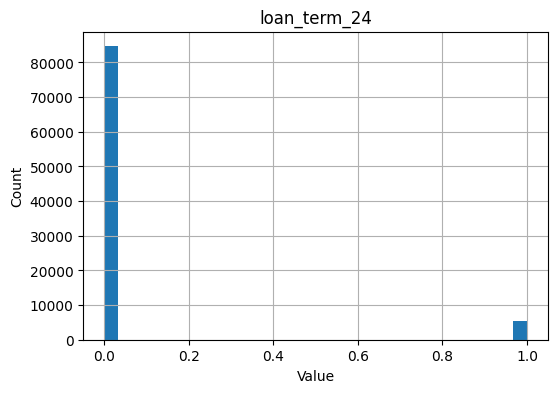

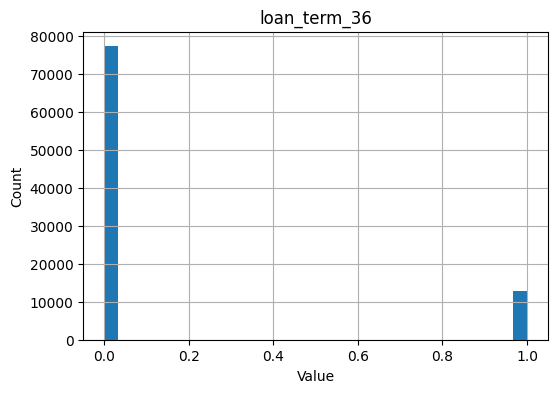

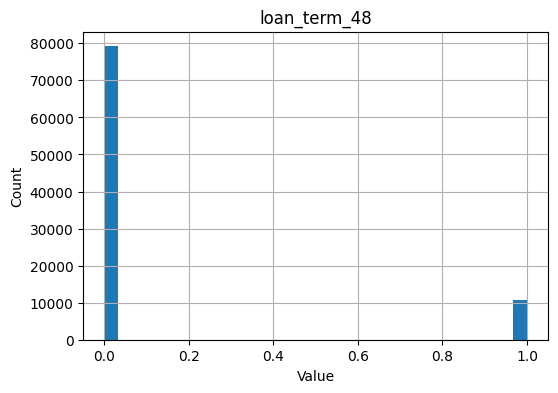

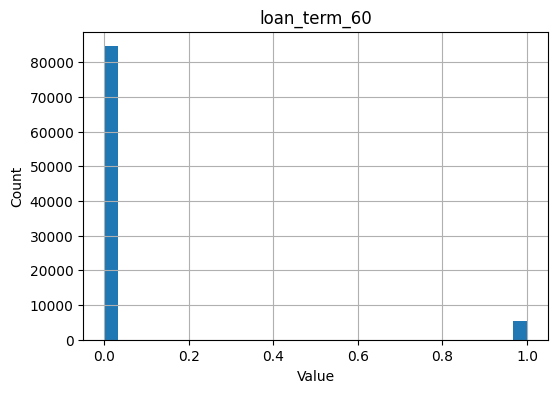

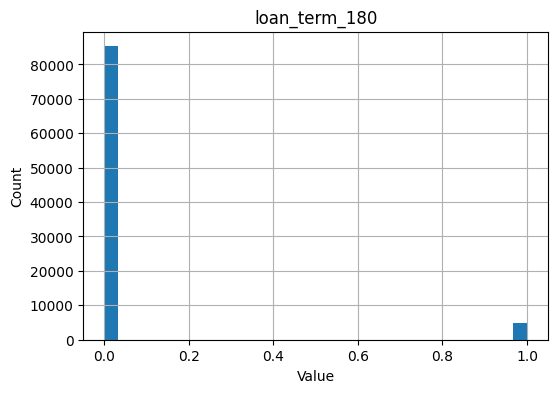

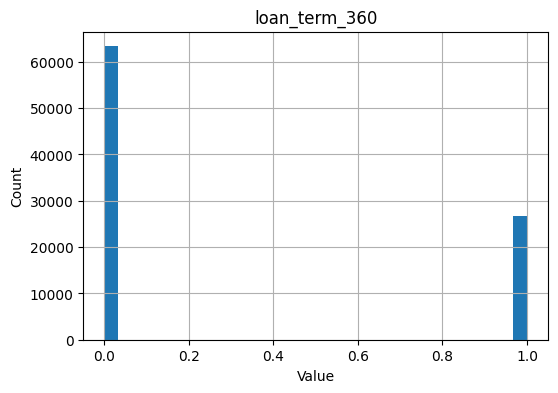

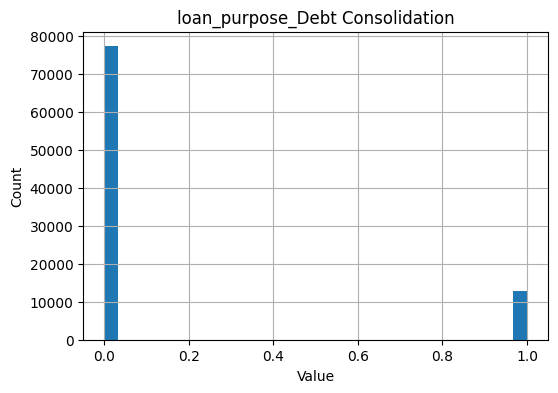

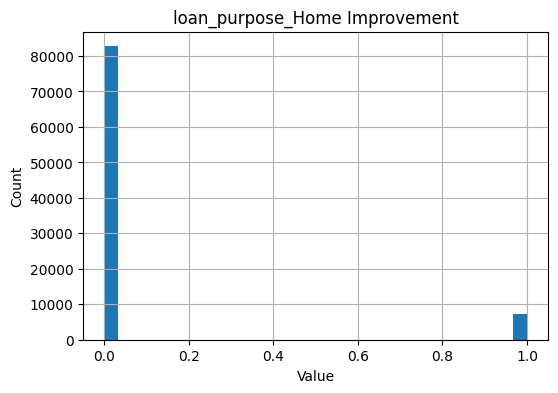

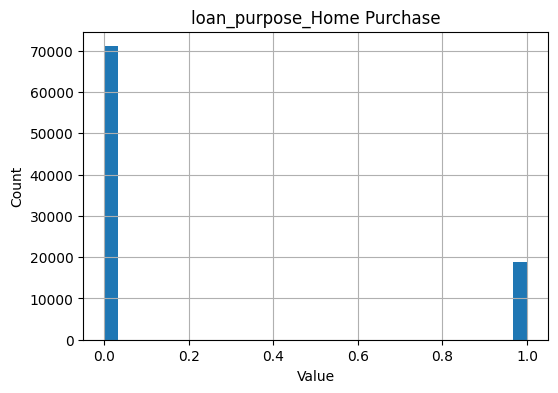

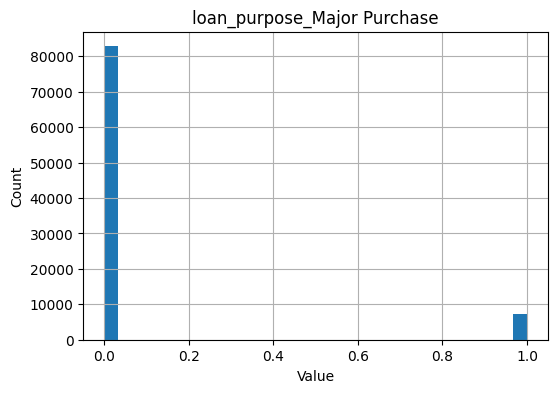

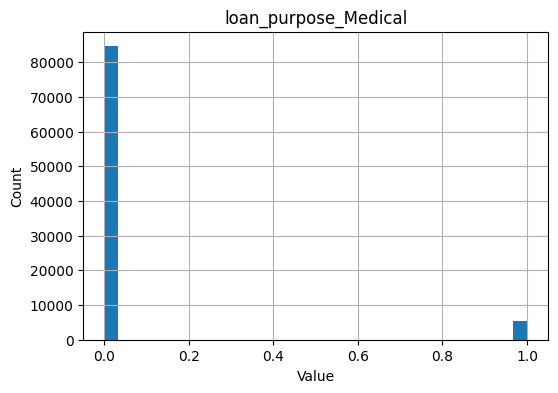

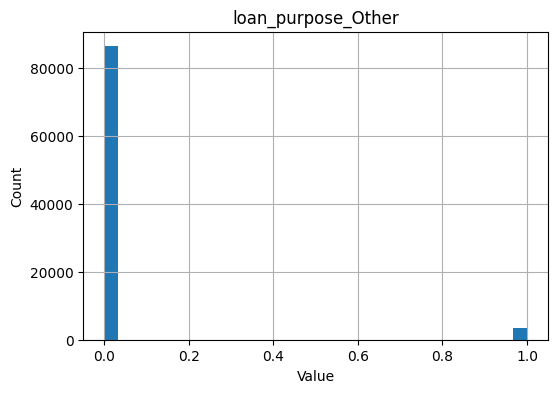

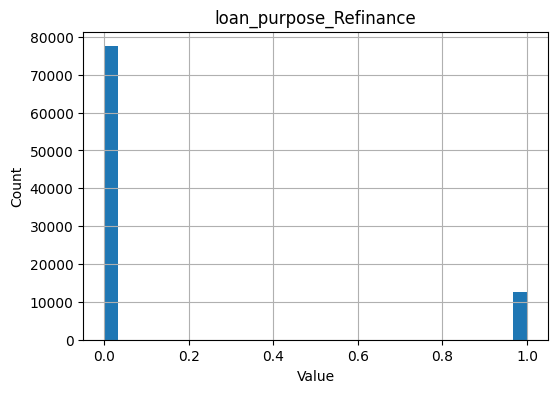

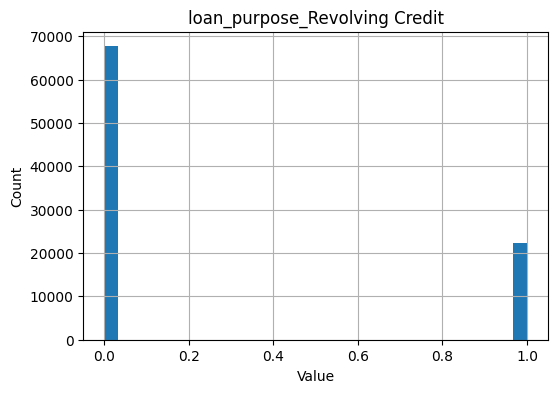

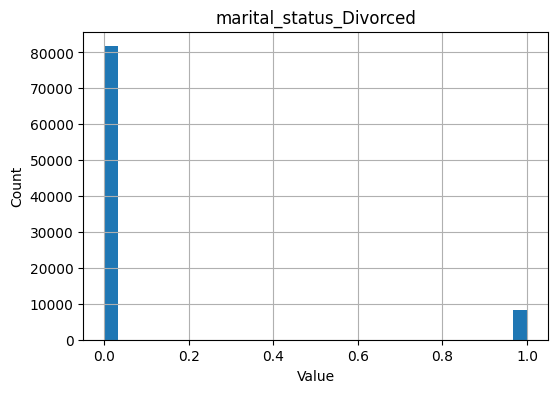

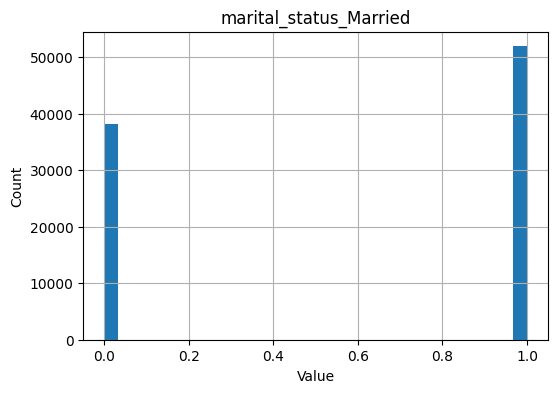

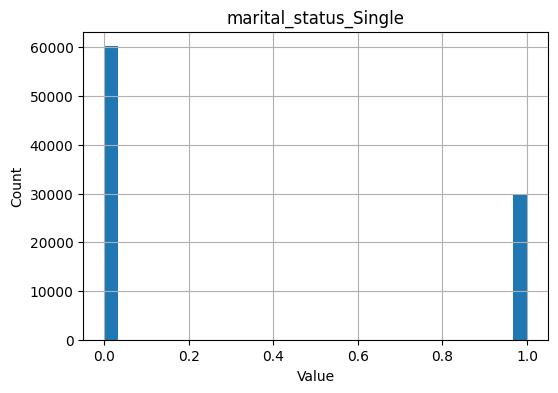

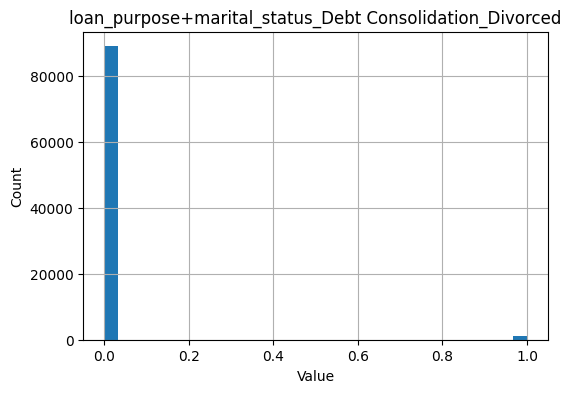

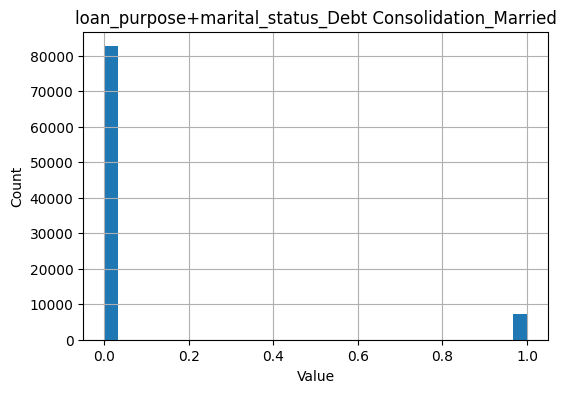

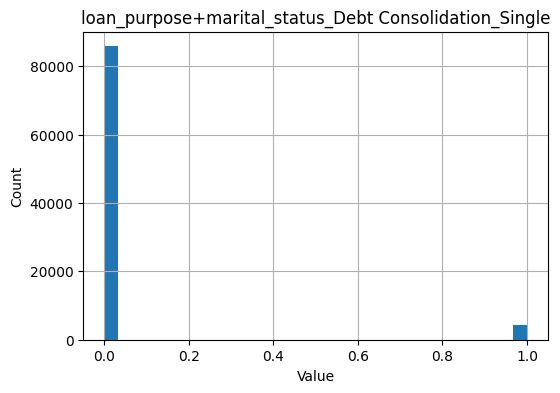

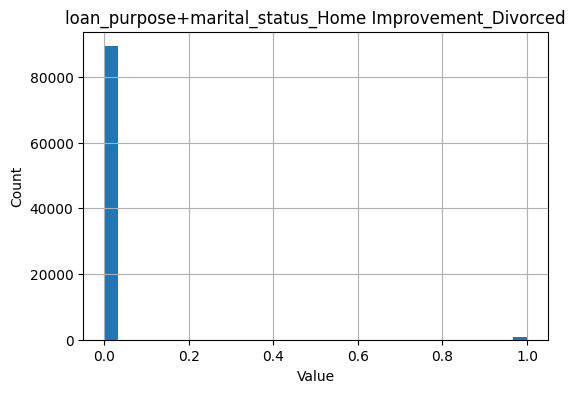

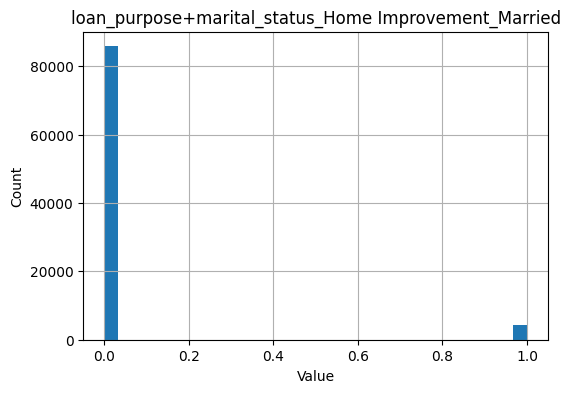

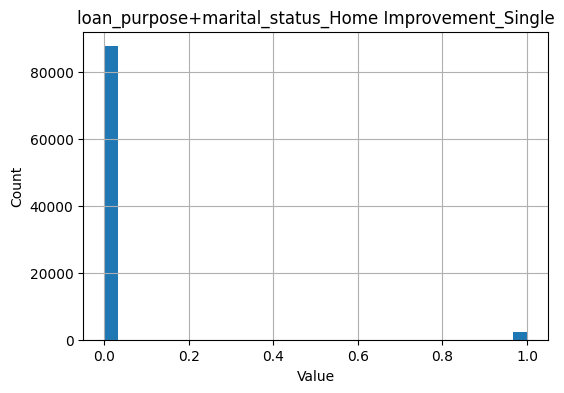

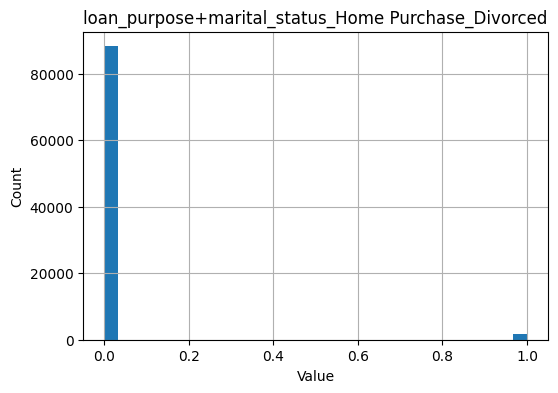

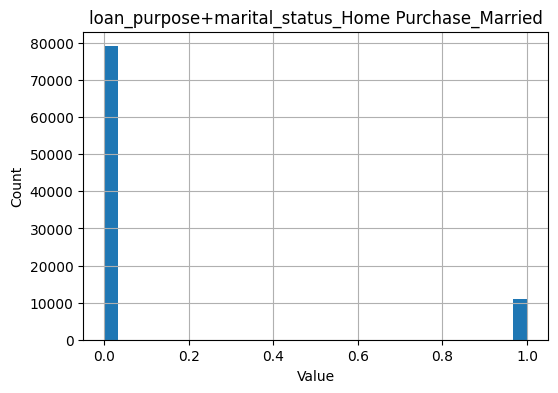

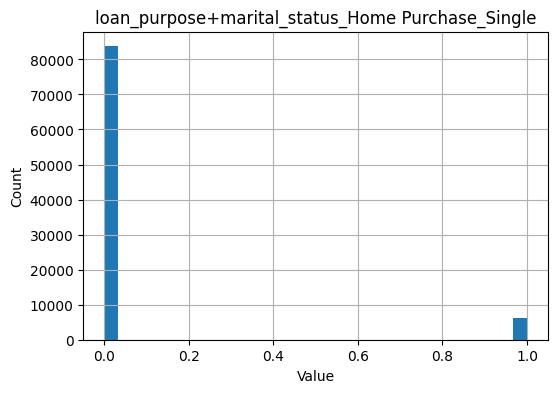

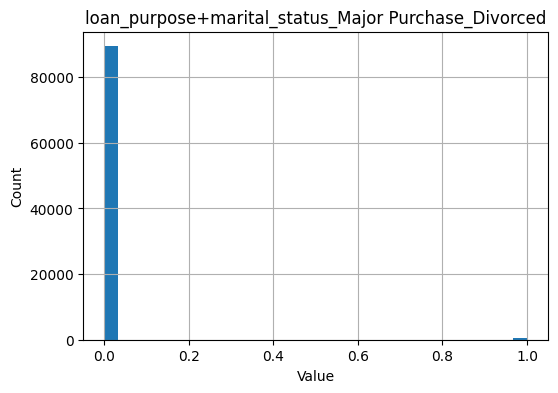

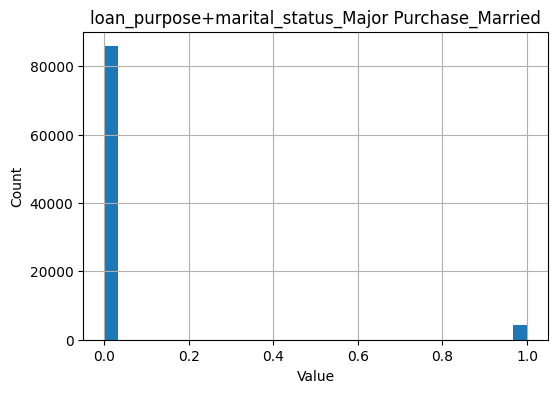

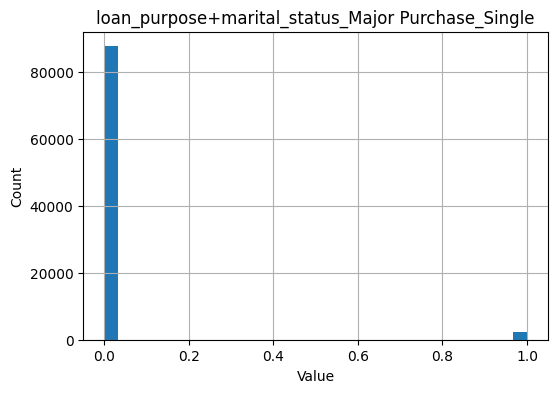

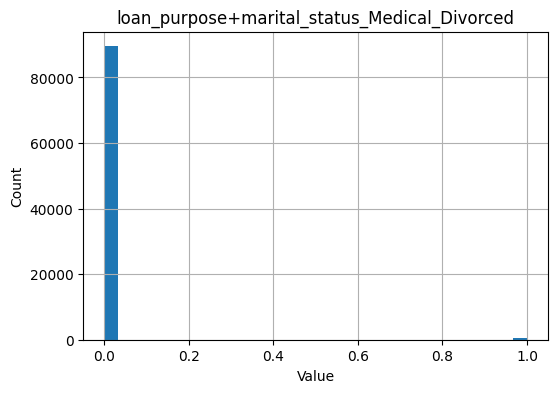

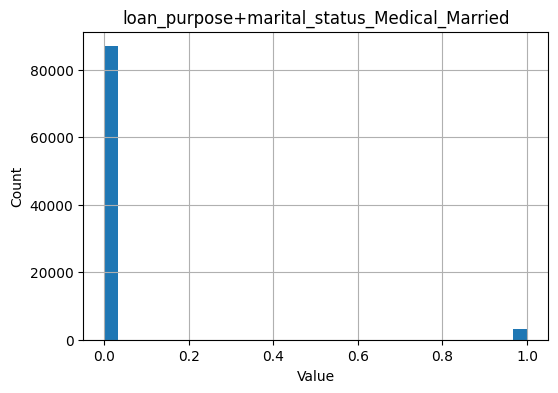

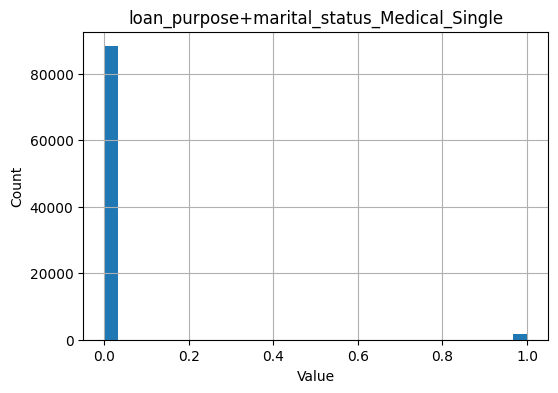

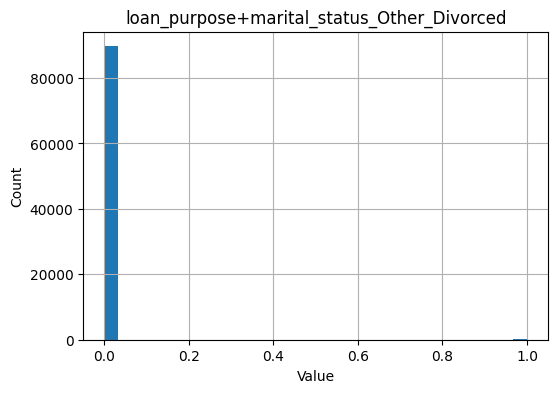

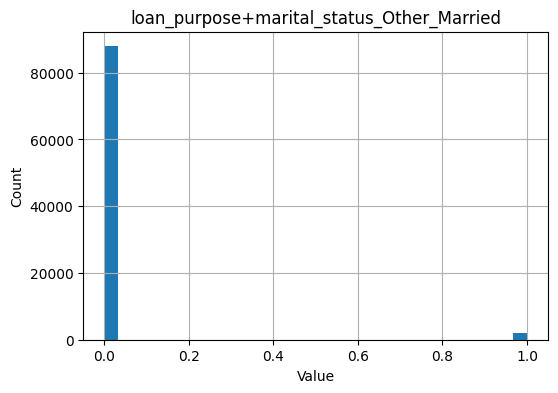

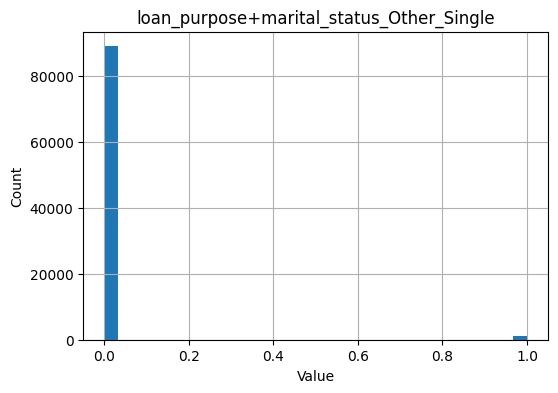

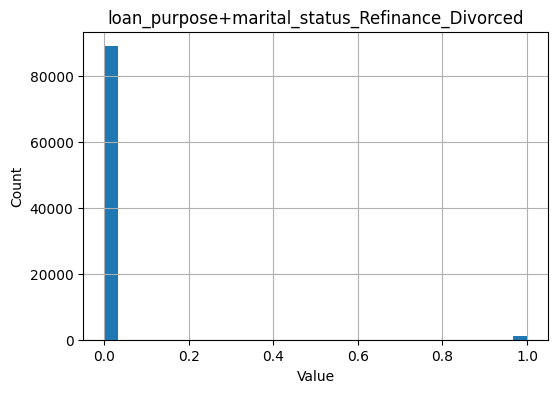

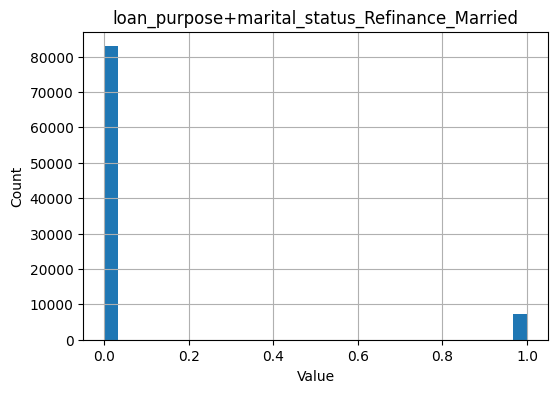

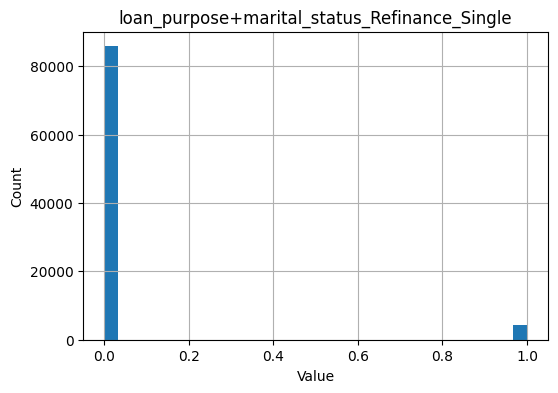

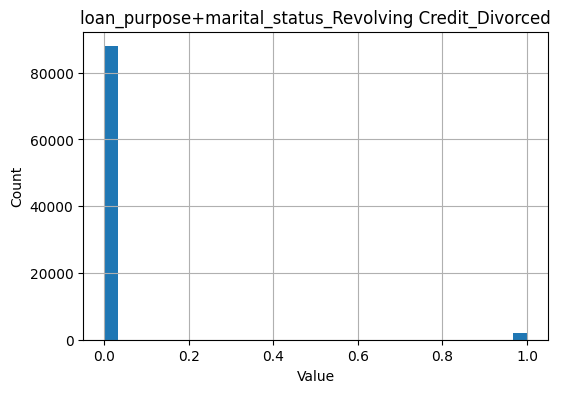

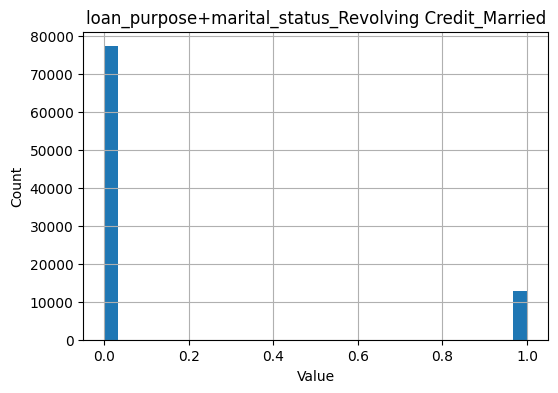

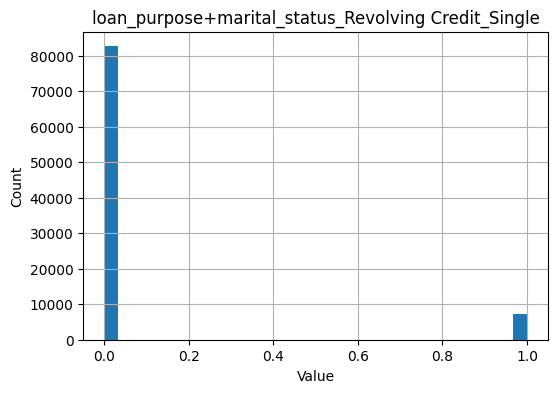

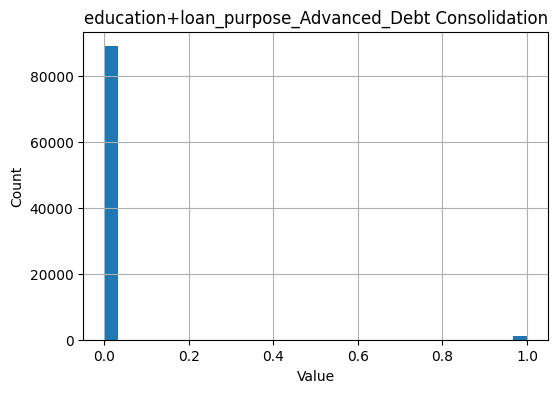

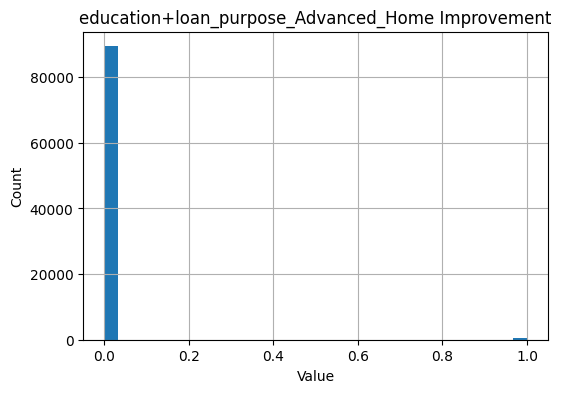

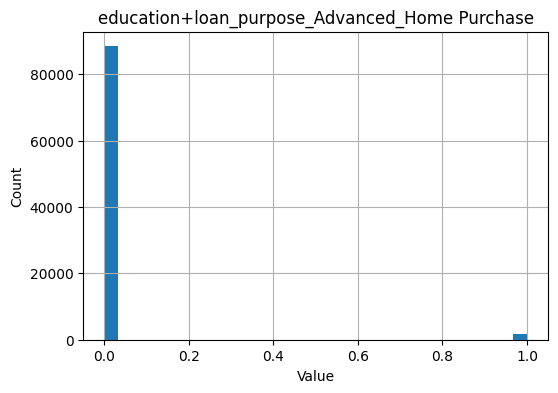

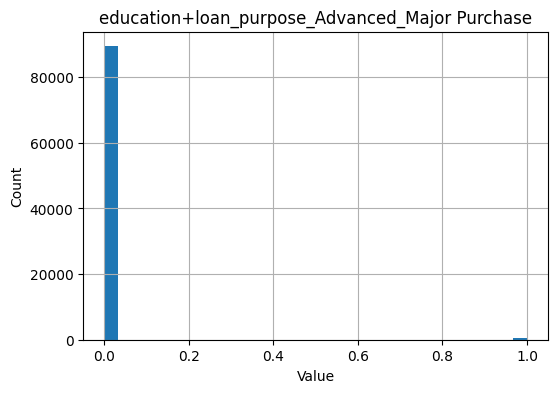

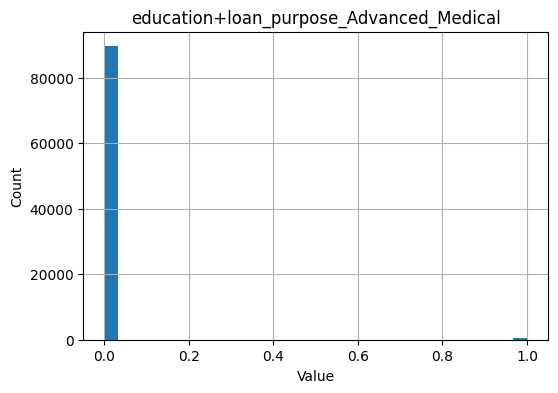

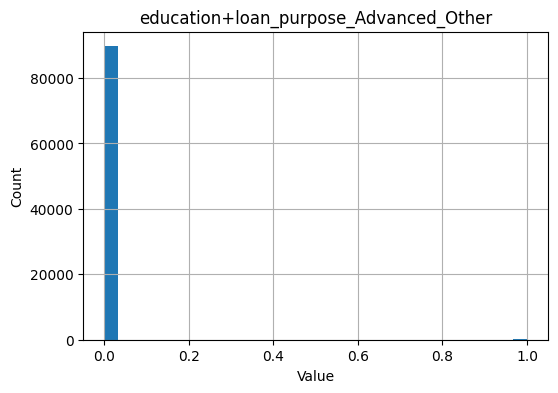

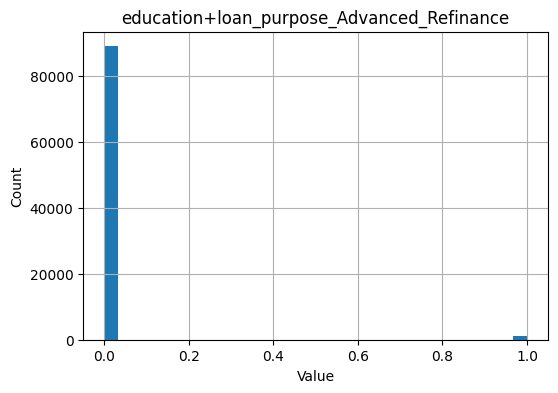

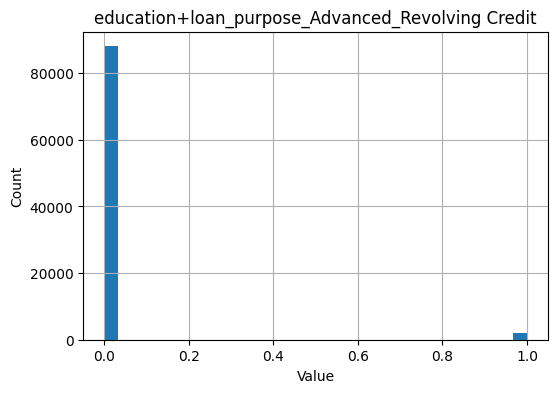

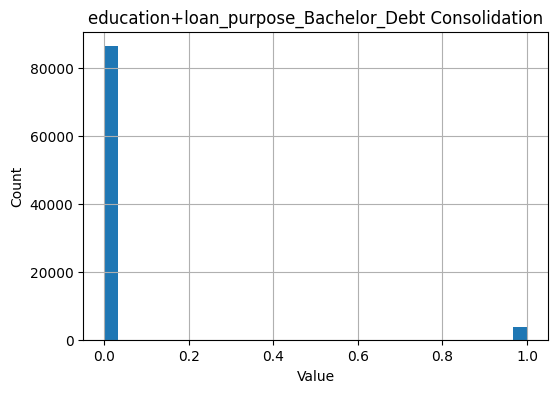

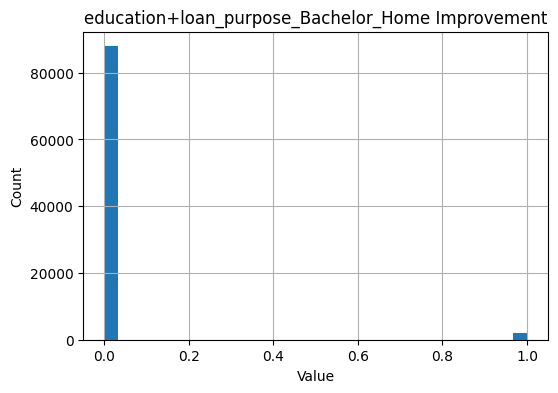

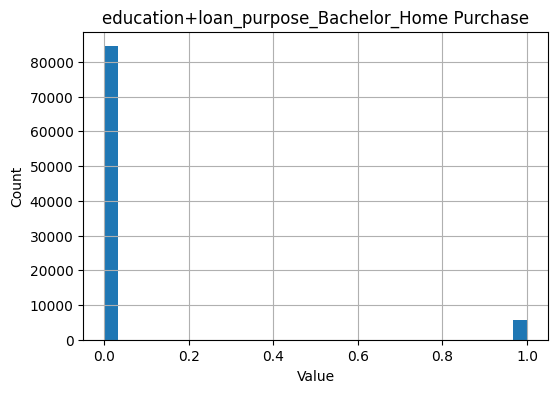

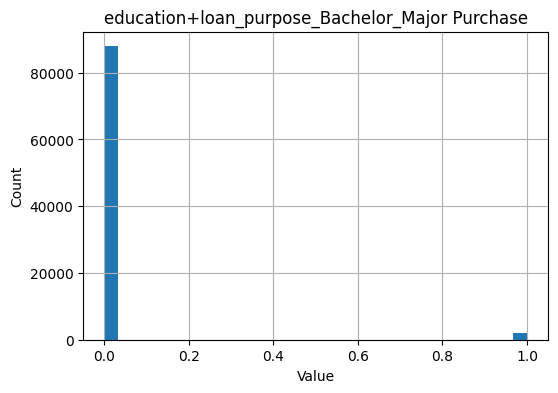

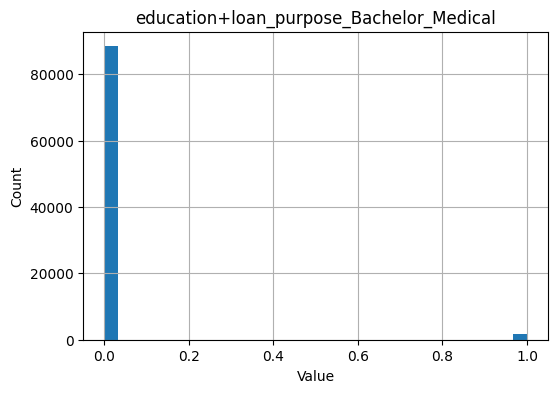

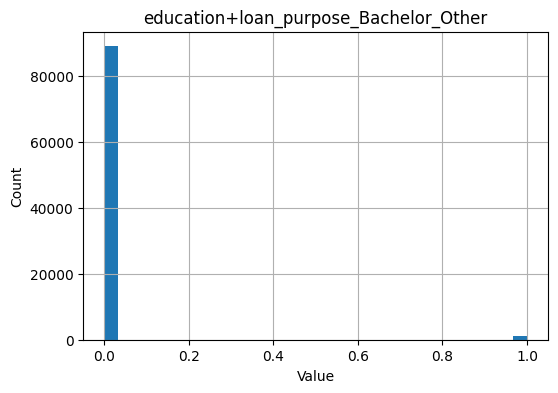

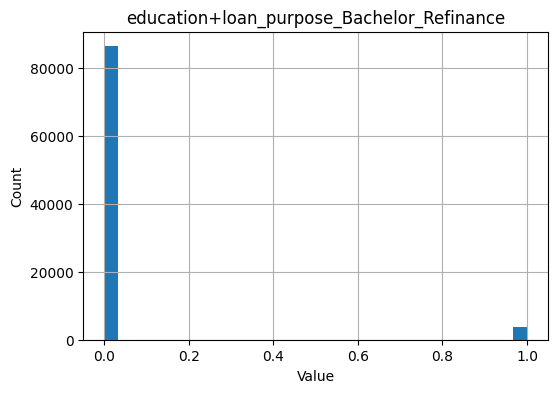

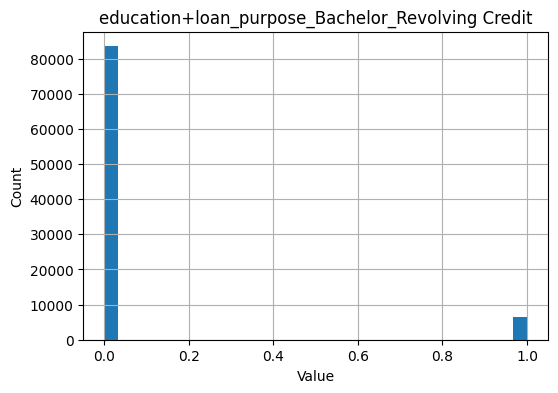

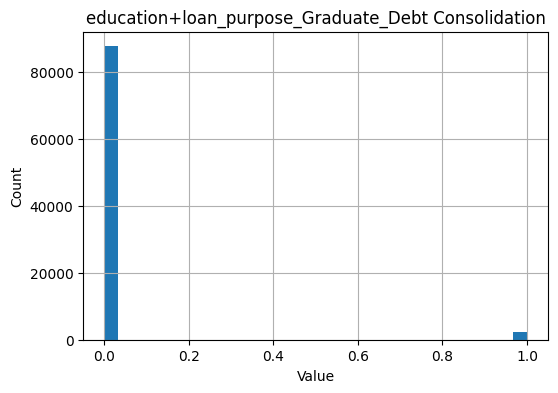

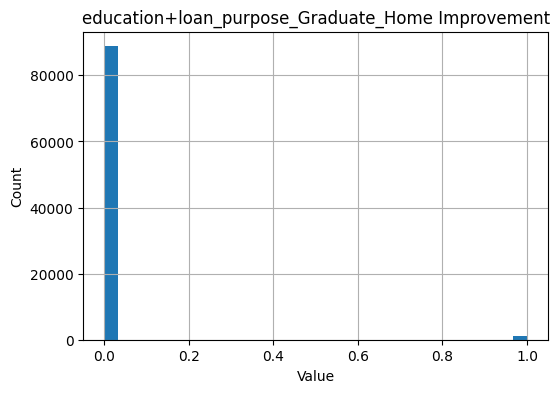

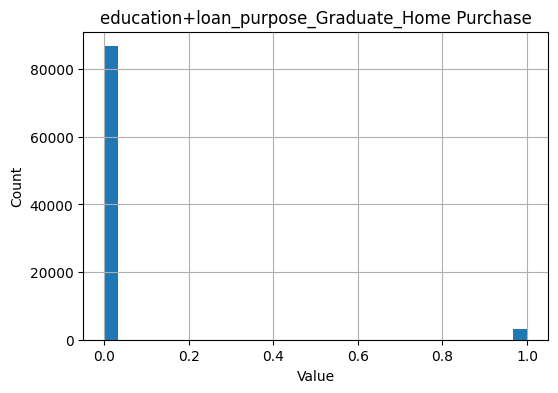

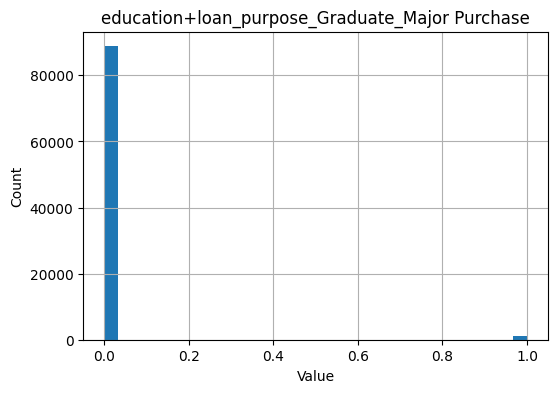

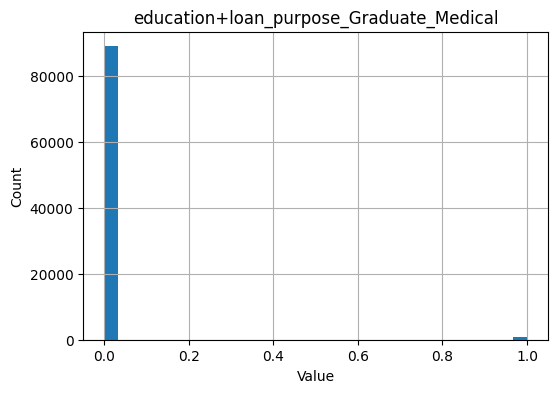

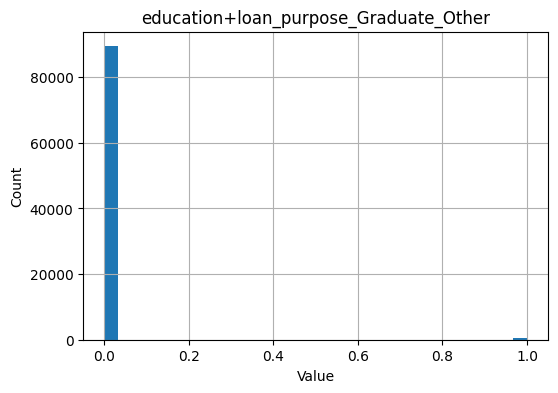

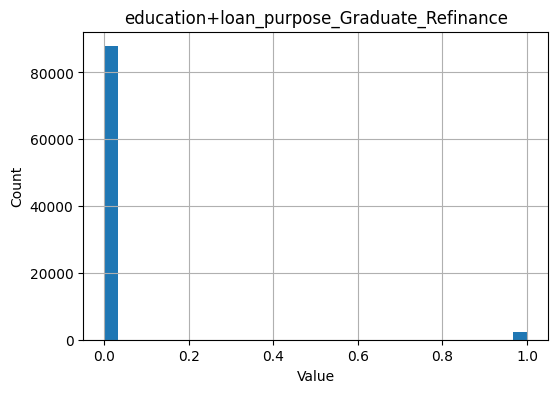

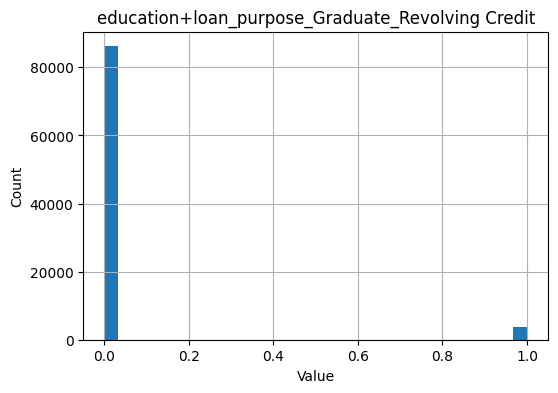

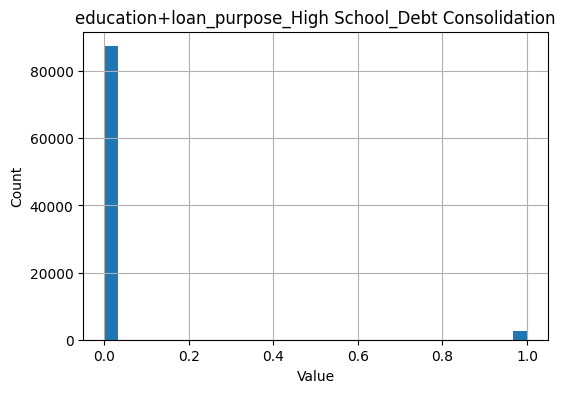

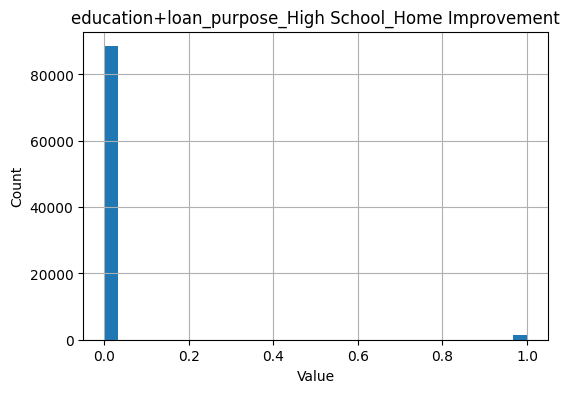

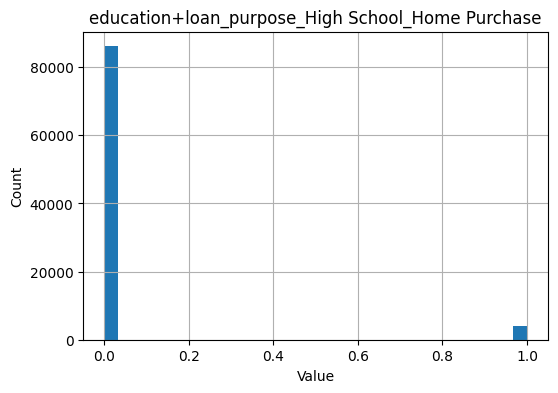

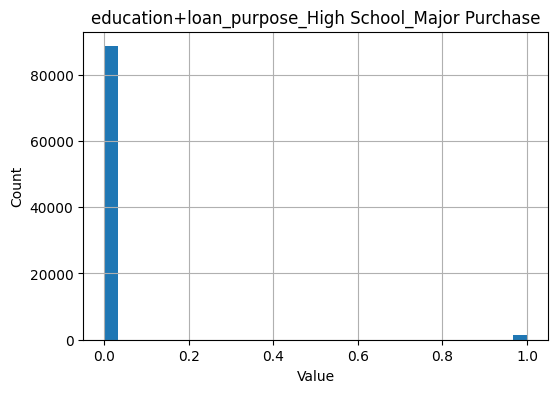

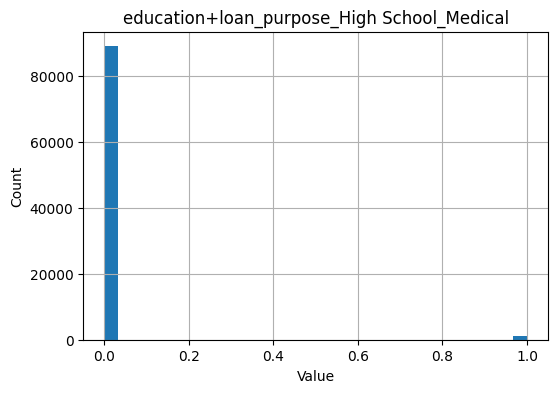

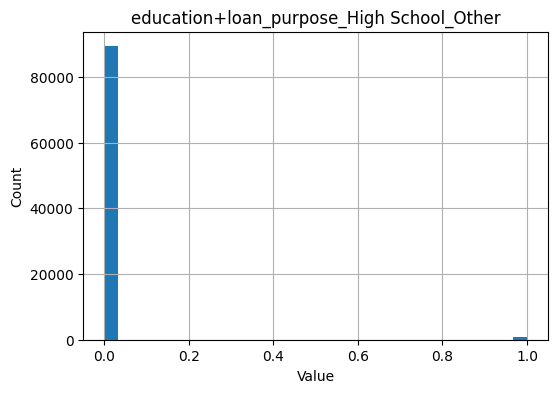

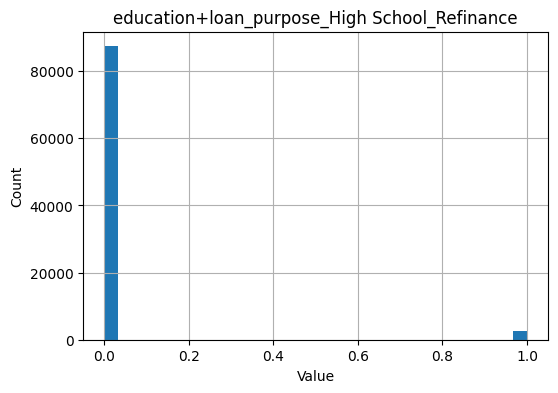

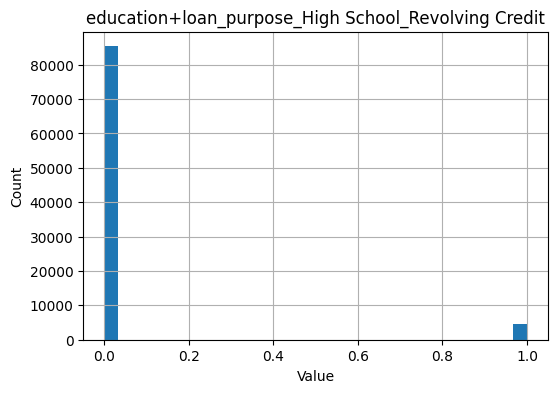

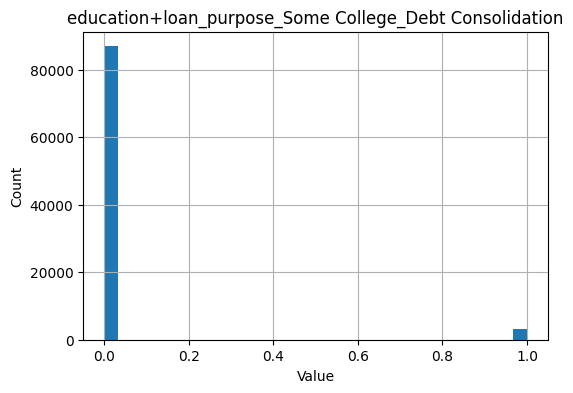

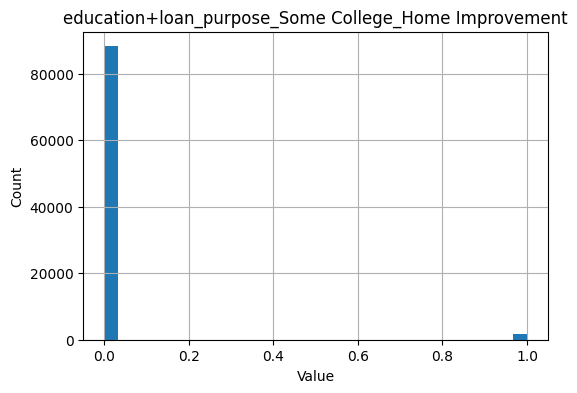

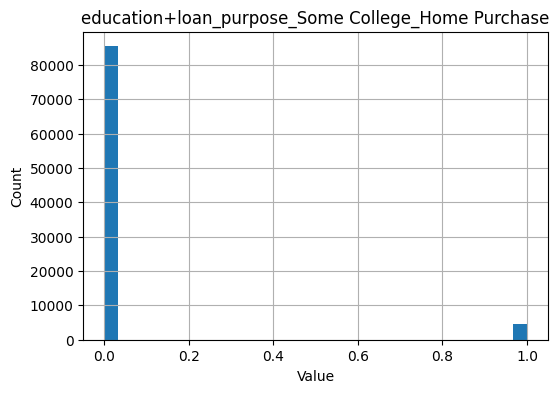

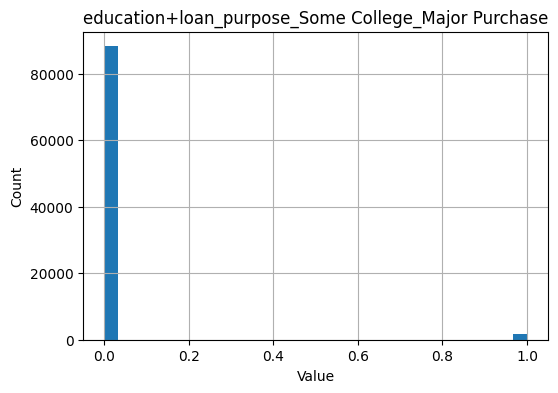

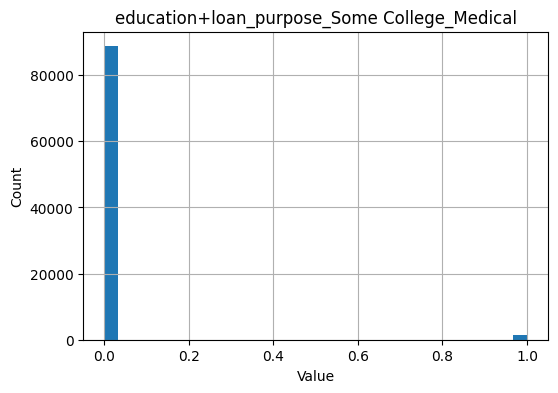

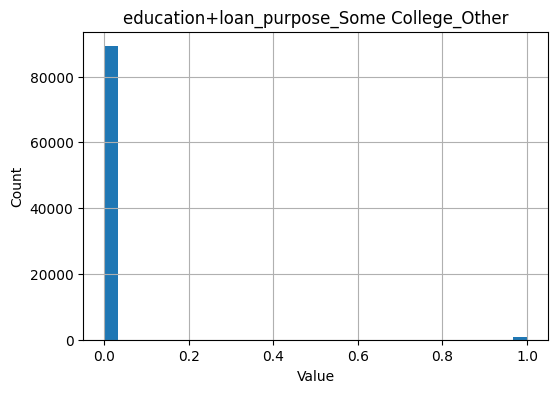

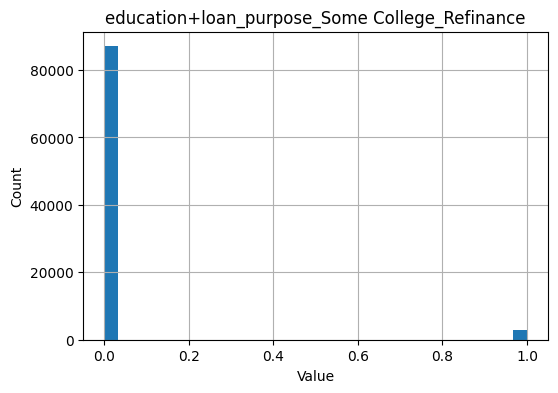

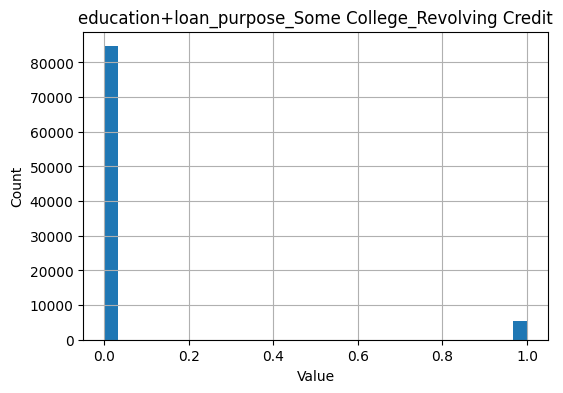

In [296]:
for col in X.columns:
    plt.figure(figsize=(6,4))
    X[col].hist(bins=30)
    plt.title(col)
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.show()

<Axes: >

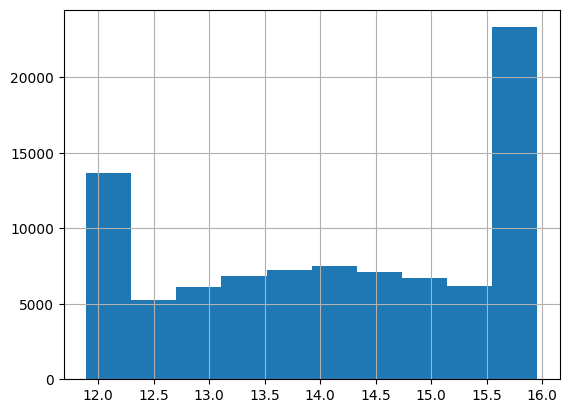

In [143]:
(X['annual_income']**(1/4)).hist()

<Axes: >

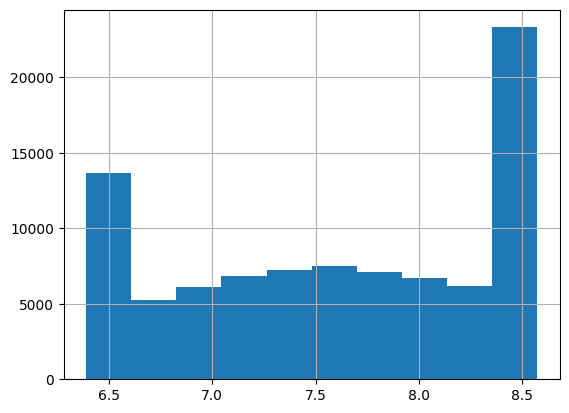

In [169]:
(X['monthly_income']**(1/4)).hist()

<Axes: >

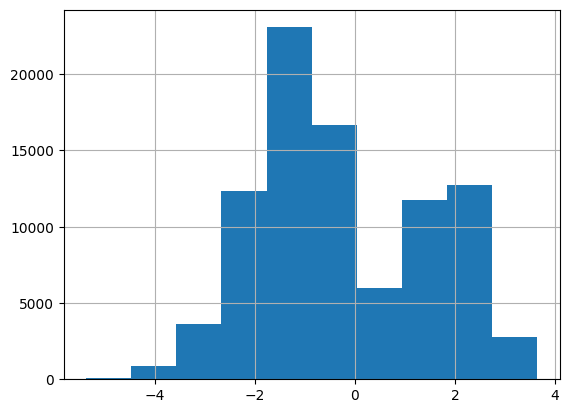

In [146]:
np.log(X['loan_to_annual_income']).hist()

<Axes: >

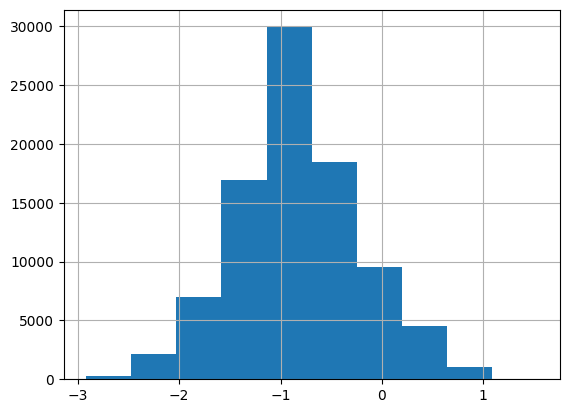

In [167]:
np.log(X['debt_to_income_ratio']).hist()

<Axes: >

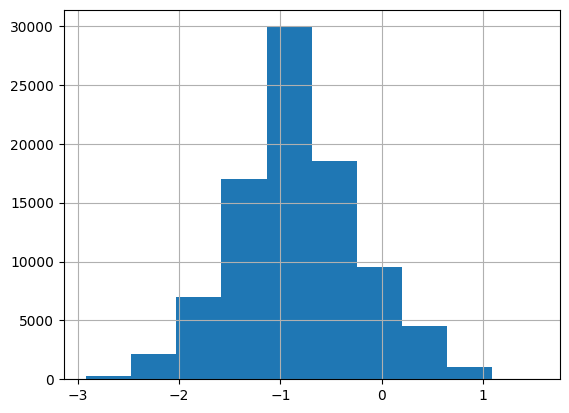

In [166]:
np.log(X['debt_service_ratio']).hist()

<Axes: >

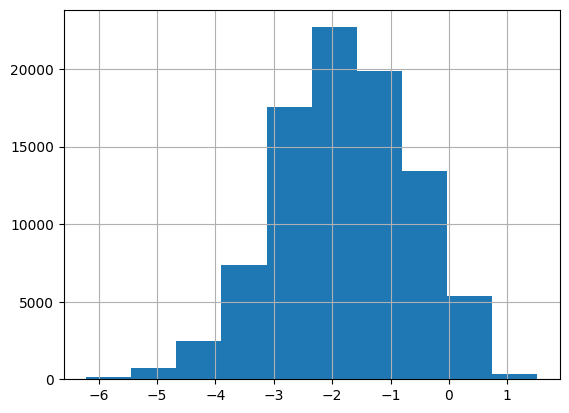

In [165]:
np.log(X['payment_to_income_ratio']).hist()

<Axes: >

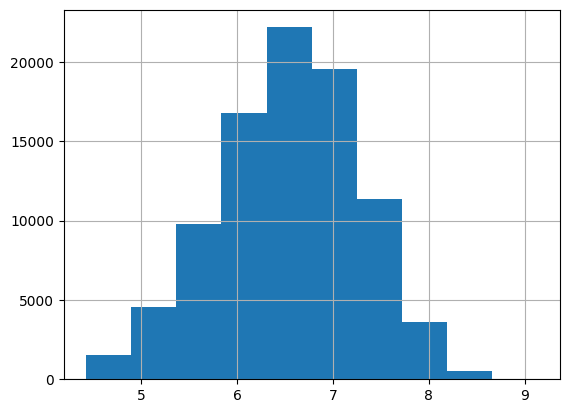

In [164]:
np.log(X['existing_monthly_debt']).hist()

In [158]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89999 entries, 0 to 89998
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   monthly_free_cash_flow     89999 non-null  float64
 1   credit_score               89999 non-null  int64  
 2   annual_income              89999 non-null  float64
 3   monthly_income             89999 non-null  float64
 4   loan_to_annual_income      89999 non-null  float64
 5   age                        89999 non-null  int64  
 6   debt_to_income_ratio       89999 non-null  float64
 7   debt_service_ratio         89999 non-null  float64
 8   payment_to_income_ratio    89999 non-null  float64
 9   available_credit           89999 non-null  float64
 10  total_credit_limit         89999 non-null  float64
 11  interest_rate              89999 non-null  float64
 12  oldest_account_age_months  89999 non-null  float64
 13  oldest_credit_line_age     89999 non-null  flo

<Axes: >

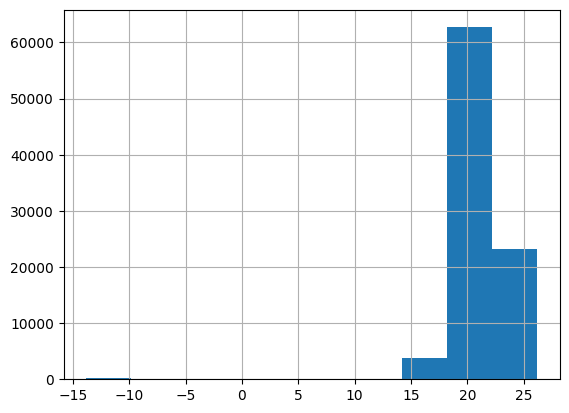

In [160]:
np.log((X['available_credit']+0.001)**2).hist()

<Axes: >

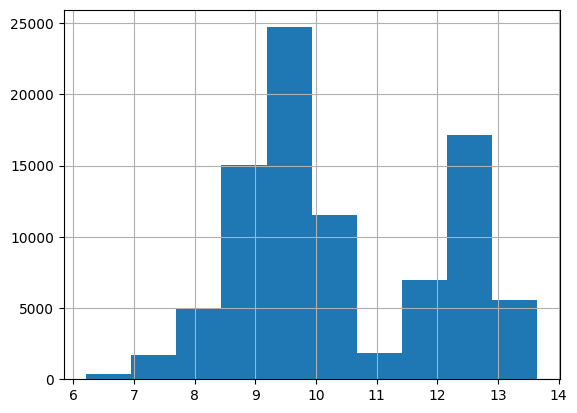

In [162]:
np.log((X['loan_amount']+0.001)).hist()

<Axes: >

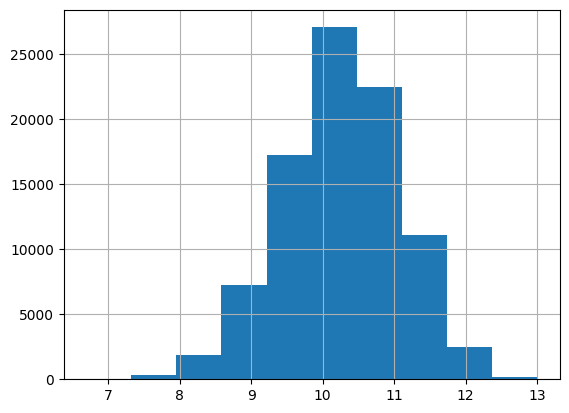

In [170]:
np.log((X['revolving_balance']+0.001)).hist()

<Axes: >

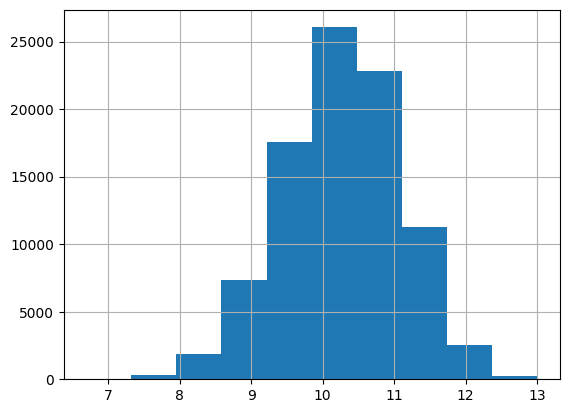

In [171]:
np.log((X['credit_usage_amount']+0.001)).hist()

In [172]:
X['credit_usage_amount']

0       142213.10
1        75932.20
2        22314.60
3         8820.00
4        24253.60
           ...   
89994    48680.40
89995    15833.00
89996    12242.70
89997    30516.60
89998     5877.60
Name: credit_usage_amount, Length: 89999, dtype: float64

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\2439030204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr())


<Axes: >

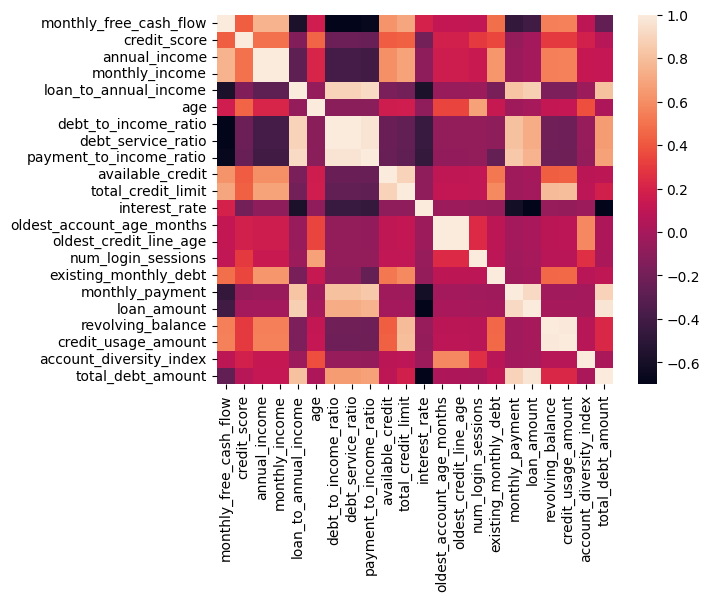

In [175]:
sns.heatmap(X.corr())

In [180]:
X = X.drop(columns=['annual_income', 'debt_service_ratio','payment_to_income_ratio'\
                ,'total_credit_limit','oldest_account_age_months','loan_amount','credit_usage_amount'])

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\2439030204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr())


<Axes: >

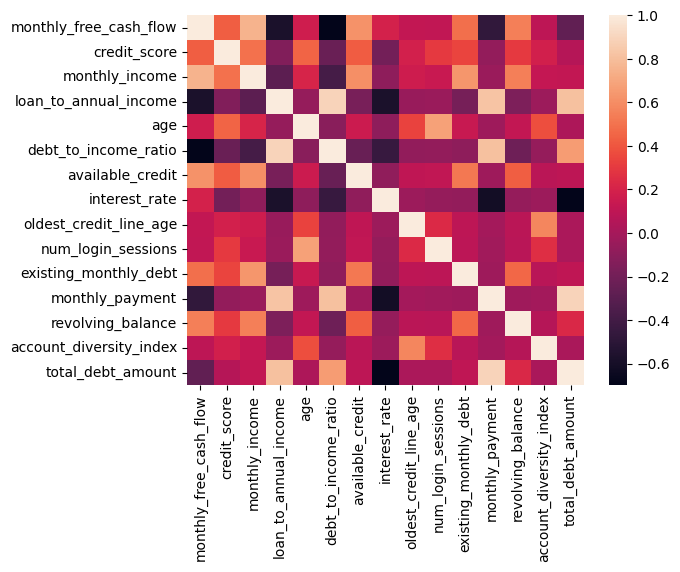

In [184]:
X['oldest_credit_line_age'].describe()

count   89999.00
mean        9.34
std         5.11
min         0.00
25%         5.40
50%         9.00
75%        12.90
max        32.20
Name: oldest_credit_line_age, dtype: float64

In [186]:
X['oldest_credit_line_age'] = np.where(X['oldest_credit_line_age']>13,13,X['oldest_credit_line_age'])

In [188]:
cols_ = ['monthly_free_cash_flow','monthly_income','available_credit','existing_monthly_debt','monthly_payment','revolving_balance','total_debt_amount']

In [189]:
for col in cols_:
    X[col] = np.log(X[col]+0.01)

C:\Users\xasanov.ay\.conda\envs\code_cbu\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [191]:
X['monthly_free_cash_flow'].fillna(0,inplace=True)

In [194]:
X['loan_to_annual_income'] = np.where(X['loan_to_annual_income']>4,4,X['loan_to_annual_income'])

In [203]:
X['interest_rate'] = pd.cut(X['interest_rate'],8)

In [205]:
X = pd.get_dummies(X)

In [209]:
model = LogisticRegression(solver='liblinear',max_iter=1000,random_state=42)

In [210]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,stratify=y, random_state=42,test_size=0.3)

In [211]:

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

print("ROC-AUC scores:", scores)
print("Mean ROC-AUC:", scores.mean())
print("STD:", scores.std())


ROC-AUC scores: [0.79203369 0.77214854 0.77868596 0.79879395 0.77446971]
Mean ROC-AUC: 0.7832263700785288
STD: 0.010391640852045326


In [212]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [215]:
roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.7804683197574109

In [220]:
df_fi

feature  roc_auc_mean  roc_auc_std  idx
0       monthly_free_cash_flow          0.74         0.01    1
1                 credit_score          0.73         0.01    2
2                annual_income          0.73         0.01    3
3               monthly_income          0.73         0.01    4
4        loan_to_annual_income          0.70         0.01    5
5                          age          0.69         0.01    6
6         debt_to_income_ratio          0.69         0.00    7
7           debt_service_ratio          0.69         0.00    8
8      payment_to_income_ratio          0.69         0.01    9
9             available_credit          0.68         0.01   10
10          total_credit_limit          0.67         0.01   11
11               interest_rate          0.65         0.01   12
12   oldest_account_age_months          0.65         0.01   13
13      oldest_credit_line_age          0.65         0.01   14
14          num_login_sessions          0.64         0.01   15
15       existing_monthly_debt          0.63         0.01   16
16                   education          0.62         0.01   17
17             monthly_payment          0.62         0.01   18
18                 loan_amount          0.61         0.01   19
19           revolving_balance          0.60         0.01   20
20         credit_usage_amount          0.60         0.01   21
21     account_diversity_index          0.60         0.01   22
22           total_debt_amount          0.60         0.01   23
23         num_credit_accounts          0.59         0.02   24
24                   loan_term          0.59         0.00   25
25                loan_purpose          0.58         0.00   26
26              marital_status          0.57         0.00   27
27          credit_utilization          0.56         0.01   28
28           employment_length          0.56         0.01   29
29         annual_debt_payment          0.55         0.01   30
30  total_monthly_debt_payment          0.55         0.01   31
31         loan_to_value_ratio          0.55         0.00   32
32           paperless_billing          0.54         0.01   33
33                   loan_type          0.54         0.03   34
34              has_mobile_app          0.53         0.01   35
35          num_public_records          0.52         0.00   36
36              num_dependents          0.52         0.01   37
37      regional_median_income          0.52         0.01   38
38      num_delinquencies_2yrs          0.51         0.00   39
39             employment_type          0.51         0.00   40
40  regional_unemployment_rate          0.51         0.01   41
41        regional_median_rent          0.51         0.01   42
42         origination_channel          0.51         0.01   43
43     application_day_of_week          0.51         0.01   44
44                       state          0.51         0.00   45
45        recent_inquiry_count          0.51         0.00   46
46           num_inquiries_6mo          0.51         0.00   47
47        cost_of_living_index          0.50         0.01   48
48           preferred_contact          0.50         0.00   49
49         housing_price_index          0.50         0.01   50
50         account_status_code          0.50         0.00   51
51           account_open_year          0.50         0.00   52
52          marketing_campaign          0.50         0.00   53
53               referral_code          0.50         0.00   54
54             num_collections          0.50         0.00   55
55            application_hour          0.50         0.01   56
56  num_customer_service_calls          0.49         0.01   57
57             loan_officer_id          0.49         0.01   58

In [225]:
X = total_df[df_fi[df_fi['idx']<=32]['feature'].to_list()]

In [227]:
X.describe()

monthly_free_cash_flow  credit_score  annual_income  monthly_income  \
count                89999.00      89999.00       89999.00        89999.00   
mean                  2143.70        716.28       42633.72         3552.82   
std                   2025.97         46.08       16103.11         1341.91   
min                  -6050.80        534.00       20000.00         1666.67   
25%                    944.00        685.00       28100.00         2341.67   
50%                   1845.90        717.00       41100.00         3425.00   
75%                   3109.91        748.00       59300.00         4941.67   
max                  29793.93        850.00       64800.00         5400.00   

       loan_to_annual_income      age  debt_to_income_ratio  \
count               89999.00 89999.00              89999.00   
mean                    2.87    38.72                  0.53   
std                     4.62    10.81                  0.38   
min                     0.00    18.00                  0.05   
25%                     0.22    31.00                  0.30   
50%                     0.51    38.00                  0.42   
75%                     3.99    46.00                  0.63   
max                    38.13    74.00                  4.63   

       debt_service_ratio  payment_to_income_ratio  available_credit  \
count            89999.00                 89999.00          89999.00   
mean                 0.53                     0.31          51926.30   
std                  0.38                     0.37          45396.04   
min                  0.05                     0.00              0.00   
25%                  0.30                     0.08          21960.40   
50%                  0.42                     0.17          38648.40   
75%                  0.63                     0.38          66798.40   
max                  4.63                     4.53         483500.00   

       total_credit_limit  interest_rate  oldest_account_age_months  \
count            89999.00       89999.00                   89999.00   
mean             91483.42          11.28                     112.13   
std              67988.31           4.61                      61.34   
min              10000.00           2.50                       0.00   
25%              45100.00           6.96                      64.80   
50%              72300.00          11.29                     108.00   
75%             117800.00          14.82                     154.80   
max             500000.00          22.80                     386.40   

       oldest_credit_line_age  num_login_sessions  existing_monthly_debt  \
count                89999.00            89999.00               89999.00   
mean                     9.34                8.81                 894.14   
std                      5.11                3.82                 679.00   
min                      0.00                1.00                  83.36   
25%                      5.40                6.00                 424.48   
50%                      9.00                8.00                 706.15   
75%                     12.90               11.00                1168.84   
max                     32.20               34.00                9229.85   

       monthly_payment  loan_amount  revolving_balance  credit_usage_amount  \
count         89999.00     89999.00           89999.00             89999.00   
mean            927.72    105977.99           39404.22             39557.13   
std             892.26    147111.30           34522.30             34753.79   
min              15.00       500.00             804.30               804.30   
25%             294.00      9800.00           16731.60             16549.90   
50%             565.94     19200.00           29294.70             29280.40   
75%            1325.95    192800.00           50465.40             50936.60   
max            7542.69    841300.00          442616.20            442616.20   

       account_diversity_index  total_debt_amount 

In [228]:
X['loan_term'] #надо перевести в категориальную

360    26662
0      22338
36     12810
48     10836
60      5414
24      5377
180     4767
12      1795
Name: loan_term, dtype: int64

In [231]:
X['loan_term'] = X['loan_term'].astype('object')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\706703895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['loan_term'] = X['loan_term'].astype('object')


In [237]:
X['monthly_free_cash_flow'] = (X['monthly_free_cash_flow'] -X['monthly_free_cash_flow'].mean()) /X['monthly_free_cash_flow'].std()

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\4057691018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['monthly_free_cash_flow'] = (X['monthly_free_cash_flow'] -X['monthly_free_cash_flow'].mean()) /X['monthly_free_cash_flow'].std()


In [240]:
X['monthly_free_cash_flow'] = np.where(X['monthly_free_cash_flow']>0.6, 0.6,X['monthly_free_cash_flow'])

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\87786352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['monthly_free_cash_flow'] = np.where(X['monthly_free_cash_flow']>0.6, 0.6,X['monthly_free_cash_flow'])


In [242]:
X['credit_score'] = (X['credit_score'] -X['credit_score'].mean()) /X['credit_score'].std()

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\1610026377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['credit_score'] = (X['credit_score'] -X['credit_score'].mean()) /X['credit_score'].std()


In [245]:
cols_ = ['annual_income', 'monthly_income', 'available_credit', 'total_credit_limit','existing_monthly_debt', 'monthly_payment'\
         ,'loan_amount','revolving_balance','credit_usage_amount','total_debt_amount','annual_debt_payment','total_monthly_debt_payment']

In [246]:
for col in cols_:
    X[col] = np.log(X[col]+0.01)

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\17647810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.log(X[col]+0.01)


In [249]:
X['num_login_sessions'] = np.where(X['num_login_sessions']>12,12,X['num_login_sessions'])

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\2648506520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['num_login_sessions'] = np.where(X['num_login_sessions']>12,12,X['num_login_sessions'])


In [251]:
lst = [('loan_purpose','marital_status'),('education','loan_purpose'),('interest_rate','loan_purpose'), ('interest_rate','education')]

In [276]:
for feat1, feat2 in lst:
    X[feat1+ '+'+ feat2] = X[feat1].astype('object') +'_'+ X[feat2].astype('object')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\168835939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feat1+ '+'+ feat2] = X[feat1].astype('object') +'_'+ X[feat2].astype('object')


TypeError: unsupported operand type(s) for +: 'pandas._libs.interval.Interval' and 'str'

In [272]:
X['interest_rate'] = pd.qcut(X['interest_rate'],7).astype('object')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [275]:
X['interest_rate'] = X['interest_rate'].astype('object')

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\943255733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['interest_rate'] = X['interest_rate'].astype('object')


In [283]:
X = pd.get_dummies(X)

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_832\1714008201.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)


In [318]:
reg = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)

In [319]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

scores = cross_val_score(
    reg,
    X_train,
    y_train,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1
)

print("ROC-AUC scores:", scores)
print("Mean ROC-AUC:", scores.mean())
print("STD:", scores.std())

ROC-AUC scores: [0.78650884 0.77583594 0.78347854 0.80520851 0.78435354]
Mean ROC-AUC: 0.7870770732350805
STD: 0.009755021574834117


In [299]:
reg.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [300]:
roc_auc_score(y_test, reg.predict_proba(X_test)[:,1])

0.7910953418002197

<Axes: >

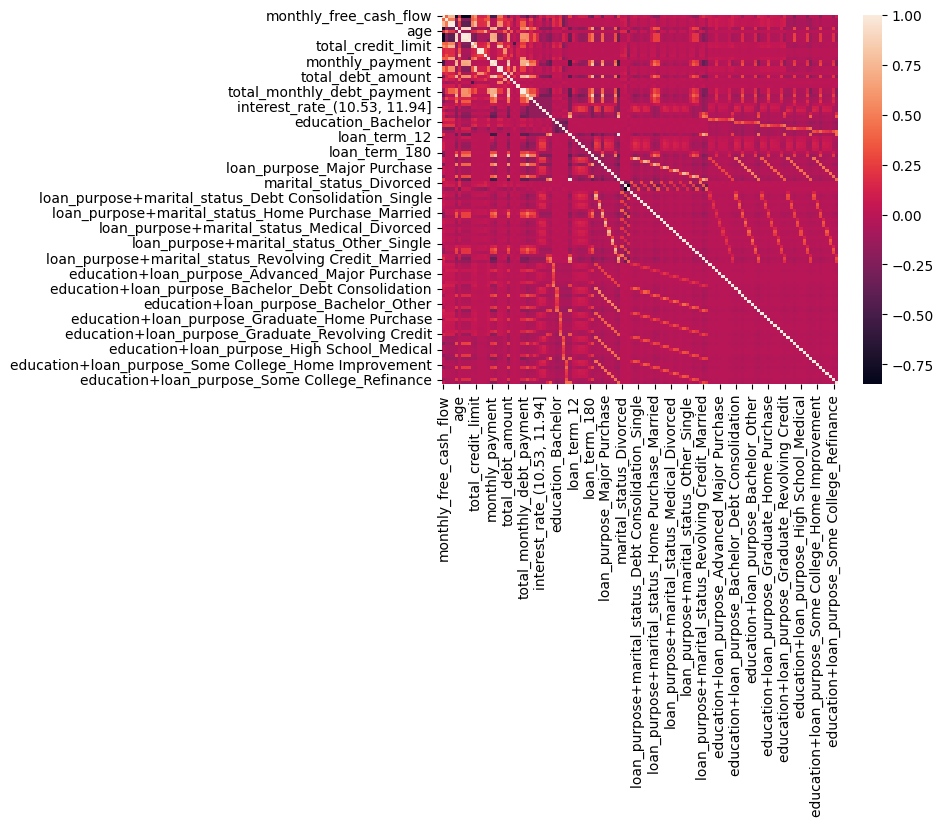

In [294]:
sns.heatmap(X.corr())

monthly_free_cash_flow  credit_score  annual_income  monthly_income  \
0                        0.60         -0.44          11.03            8.55   
1                       -0.58         -1.24          10.26            7.78   
2                       -0.46         -1.18           9.94            7.45   
3                       -0.02         -0.87          10.35            7.87   
4                       -0.33         -0.83          10.11            7.63   
...                       ...           ...            ...             ...   
89994                    0.60          2.19          11.08            8.59   
89995                   -0.57          0.62           9.90            7.42   
89996                   -0.60         -2.37           9.90            7.42   
89997                   -0.49         -0.83           9.90            7.42   
89998                   -1.45          0.30          10.15            7.67   

       loan_to_annual_income  age  debt_to_income_ratio  debt_service_ratio  \
0                       0.29   41                  0.26                0.26   
1                       3.99   38                  0.59                0.59   
2                       0.45   18                  0.30                0.30   
3                       0.28   27                  0.20                0.20   
4                       0.29   26                  0.29                0.28   
...                      ...  ...                   ...                 ...   
89994                   0.16   52                  0.44                0.44   
89995                   0.83   61                  0.41                0.41   
89996                   0.89   19                  0.45                0.45   
89997                   0.58   21                  0.31                0.31   
89998                  19.03   36                  1.37                1.37   

       payment_to_income_ratio  available_credit  total_credit_limit  \
0                         0.12             10.20               12.04   
1                         0.42              7.73               11.27   
2                         0.18              9.86               10.63   
3                         0.09             10.84               11.00   
4                         0.16             10.14               10.81   
...                        ...               ...                 ...   
89994                     0.09             11.37               11.82   
89995                     0.33             10.27               10.71   
89996                     0.37              8.71                9.81   
89997                     0.21             10.08               10.90   
89998                     1.23              9.79               10.07   

       oldest_account_age_months  oldest_credit_line_age  num_login_sessions  \
0                         273.60                   22.80                  12   
1                          42.00                    3.50                   6   
2                           0.00                    0.00                   1   
3                         108.00                    9.00                   4   
4                          96.00                    8.00                   6   
...                          ...                     ...                 ...   
89994                      98.40                    8.20                  10   
89995                     105.60                    8.80                  12   
89996                      12.00                    1.00                   4   
89997                      36.00                    3.00                   5   
89998                     189.60                   15.80                   5   

       existing_monthly_debt  monthly_payment  loan_amount  revolving_balance  \
0                       6.60             6.38         9.78              11.87   
1                       5.97             6.92        11.64              11.24   
2                       5.32             5.76       

In [304]:
ff = pd.DataFrame({'cols':X.columns,'fi':reg.feature_importances_})

In [308]:
ff.sort_values('fi', ascending=False).to_excel(r'D:\TrashFolder\cbu_code\fff.xlsx')

In [313]:
lst = ['credit_score',
'payment_to_income_ratio',
'debt_service_ratio',
'debt_to_income_ratio',
'age',
'monthly_free_cash_flow',
'annual_income',
'monthly_income',
'loan_to_annual_income',
'available_credit',
'monthly_payment',
'total_credit_limit',
'num_login_sessions',
'oldest_account_age_months',
'total_monthly_debt_payment',
'num_credit_accounts',
'annual_debt_payment',
'oldest_credit_line_age',
'total_debt_amount',
'existing_monthly_debt',
'account_diversity_index',
'loan_amount',
'credit_utilization',
'revolving_balance',
'employment_length',
'education_High School',
'credit_usage_amount',
'interest_rate_(7.42, 10.53]',
'marital_status_Single',
'loan_to_value_ratio',
'interest_rate_(2.499, 5.87]',
'interest_rate_(13.64, 17.42]',
'education+loan_purpose_High School_Debt Consolidation',
'loan_purpose+marital_status_Home Purchase_Single',
'marital_status_Married',
'education+loan_purpose_High School_Home Purchase',
'loan_term_0',
'education_Graduate',
'interest_rate_(11.94, 13.64]',
'loan_purpose_Revolving Credit']

In [316]:
X = X[lst]

In [322]:
df_fi

feature  roc_auc_mean  roc_auc_std  idx
0       monthly_free_cash_flow          0.74         0.01    1
1                 credit_score          0.73         0.01    2
2                annual_income          0.73         0.01    3
3               monthly_income          0.73         0.01    4
4        loan_to_annual_income          0.70         0.01    5
5                          age          0.69         0.01    6
6         debt_to_income_ratio          0.69         0.00    7
7           debt_service_ratio          0.69         0.00    8
8      payment_to_income_ratio          0.69         0.01    9
9             available_credit          0.68         0.01   10
10          total_credit_limit          0.67         0.01   11
11               interest_rate          0.65         0.01   12
12   oldest_account_age_months          0.65         0.01   13
13      oldest_credit_line_age          0.65         0.01   14
14          num_login_sessions          0.64         0.01   15
15       existing_monthly_debt          0.63         0.01   16
16                   education          0.62         0.01   17
17             monthly_payment          0.62         0.01   18
18                 loan_amount          0.61         0.01   19
19           revolving_balance          0.60         0.01   20
20         credit_usage_amount          0.60         0.01   21
21     account_diversity_index          0.60         0.01   22
22           total_debt_amount          0.60         0.01   23
23         num_credit_accounts          0.59         0.02   24
24                   loan_term          0.59         0.00   25
25                loan_purpose          0.58         0.00   26
26              marital_status          0.57         0.00   27
27          credit_utilization          0.56         0.01   28
28           employment_length          0.56         0.01   29
29         annual_debt_payment          0.55         0.01   30
30  total_monthly_debt_payment          0.55         0.01   31
31         loan_to_value_ratio          0.55         0.00   32
32           paperless_billing          0.54         0.01   33
33                   loan_type          0.54         0.03   34
34              has_mobile_app          0.53         0.01   35
35          num_public_records          0.52         0.00   36
36              num_dependents          0.52         0.01   37
37      regional_median_income          0.52         0.01   38
38      num_delinquencies_2yrs          0.51         0.00   39
39             employment_type          0.51         0.00   40
40  regional_unemployment_rate          0.51         0.01   41
41        regional_median_rent          0.51         0.01   42
42         origination_channel          0.51         0.01   43
43     application_day_of_week          0.51         0.01   44
44                       state          0.51         0.00   45
45        recent_inquiry_count          0.51         0.00   46
46           num_inquiries_6mo          0.51         0.00   47
47        cost_of_living_index          0.50         0.01   48
48           preferred_contact          0.50         0.00   49
49         housing_price_index          0.50         0.01   50
50         account_status_code          0.50         0.00   51
51           account_open_year          0.50         0.00   52
52          marketing_campaign          0.50         0.00   53
53               referral_code          0.50         0.00   54
54             num_collections          0.50         0.00   55
55            application_hour          0.50         0.01   56
56  num_customer_service_calls          0.49         0.01   57
57             loan_officer_id          0.49         0.01   58

In [41]:
total_df.groupby('state')['default'].sum()/total_df.groupby('state')['default'].count()

state
AZ   0.05
CA   0.05
FL   0.05
GA   0.05
IL   0.05
IN   0.05
MA   0.05
MD   0.05
MI   0.06
MO   0.05
NC   0.05
NJ   0.06
NY   0.05
OH   0.05
PA   0.04
TN   0.06
TX   0.05
VA   0.06
WA   0.05
WI   0.05
Name: default, dtype: float64

In [79]:
total_df.groupby('num_customer_service_calls')['default'].sum()/total_df.groupby('num_customer_service_calls')['default'].count()

num_customer_service_calls
0    0.05
1    0.05
2    0.05
3    0.05
4    0.05
5    0.05
6    0.04
7    0.04
8    0.08
9    0.00
10   0.00
11   0.00
Name: default, dtype: float64

In [32]:
lst = ['preferred_contact','state','employment_type','referral_code','account_status_code','origination_channel','marketing_campaign','application_day_of_week'\
      ,'application_hour','account_open_year','previous_zip_code','num_customer_service_calls']

In [36]:
#total_df=pd.read_csv(r'D:\TrashFolder\cbu_code\total_df2.csv')
total_df.drop(columns=[x for x in lst if x in total_df.columns],inplace=True)

In [37]:
total_df.describe()

Unnamed: 0      age  annual_income  employment_length  num_dependents  \
count    89999.00 89999.00       89999.00           89999.00        89999.00   
mean     44999.00    38.72       47586.73               5.51            1.20   
std      25980.62    10.81       26691.16               3.23            1.14   
min          0.00    18.00       20000.00               0.00            0.00   
25%      22499.50    31.00       28100.00               3.00            0.00   
50%      44999.00    38.00       41100.00               5.20            1.00   
75%      67498.50    46.00       59300.00               7.60            2.00   
max      89998.00    74.00      487200.00              23.90            5.00   

       num_login_sessions  has_mobile_app  paperless_billing  default  \
count            89999.00        89999.00           89999.00 89999.00   
mean                 8.81            0.71               0.62     0.05   
std                  3.82            0.45               0.49     0.22   
min                  1.00            0.00               0.00     0.00   
25%                  6.00            0.00               0.00     0.00   
50%                  8.00            1.00               1.00     0.00   
75%                 11.00            1.00               1.00     0.00   
max                 34.00            1.00               1.00     1.00   

       monthly_income  existing_monthly_debt  monthly_payment  \
count        89999.00               89999.00         89999.00   
mean          3965.57                 894.14           927.72   
std           2224.25                 679.00           892.26   
min           1666.67                  83.36            15.00   
25%           2341.67                 424.48           294.00   
50%           3425.00                 706.15           565.94   
75%           4941.67                1168.84          1325.95   
max          40600.00                9229.85          7542.69   

       debt_to_income_ratio  debt_service_ratio  payment_to_income_ratio  \
count              89999.00            89999.00                 89999.00   
mean                   0.53                0.53                     0.31   
std                    0.38                0.38                     0.37   
min                    0.05                0.05                     0.00   
25%                    0.30                0.30                     0.08   
50%                    0.42                0.42                     0.17   
75%                    0.63                0.63                     0.38   
max                    4.63                4.63                     4.53   

       credit_utilization  revolving_balance  credit_usage_amount  \
count            89999.00           89999.00             89999.00   
mean                 0.44           39404.22             39557.13   
std                  0.18           34522.30             34753.79   
min                  0.01             804.30               804.30   
25%                  0.31           16731.60             16549.90   
50%                  0.43           29294.70             29280.40   
75%                  0.57           50465.40             50936.60   
max                  1.00          442616.20            442616.20   

       available_credit  total_monthly_debt_payment  annual_debt_payment  \
count          89999.00                    89999.00             89999.00   
mean           51926.30                     1821.86             21862.33   
std            45396.04                     1105.88             13270.51   
min                0.00                      111.13              1333.56   
25%            21960.40                      980.24             11762.88   
50%            38648.40                     1554.61             18655.32   
75%            66798.40                     2431.09             29173.08   
max           483500.00                    10806.07            129672.84   

       loan_to_annual_income  total_debt_amount  m

In [64]:
np.quantile(total_df['annual_income'],0.85)

71800.0

In [88]:
tt = total_df.copy()

In [38]:
for col in total_df.columns:
    if col in ['default','age','credit_score','num_delinquencies_2yrs','num_inquiries_6mo','recent_inquiry_count','num_public_records','num_collections']:
        continue
    if total_df[col].dtype in ('float64','int64'):
        total_df[col] = np.where(total_df[col]>np.quantile(total_df[col],0.85), np.quantile(total_df[col],0.85),total_df[col])

In [39]:
total_df['loan_officer_id'] = total_df['loan_officer_id'].astype('object')

In [40]:
total_df.loc[total_df['num_delinquencies_2yrs']>=1, 'num_delinquencies_2yrs'] =1 

In [41]:
cols = ['annual_income', 'monthly_income','existing_monthly_debt','monthly_payment','revolving_balance','credit_usage_amount',\
'available_credit','total_monthly_debt_payment','annual_debt_payment','total_debt_amount','regional_median_income','regional_median_rent',\
'total_credit_limit','loan_amount']

In [42]:
for col in cols:
    total_df[col] = (total_df[col] - total_df[col].mean())/total_df[col].std()

In [114]:
total_df.to_csv(r'D:\TrashFolder\cbu_code\temp2.csv')

In [43]:
total_df['monthly_free_cash_flow'] = np.where(total_df['monthly_free_cash_flow']<0, 0, total_df['monthly_free_cash_flow'])

In [44]:
total_df['monthly_free_cash_flow'] = (total_df['monthly_free_cash_flow'] - total_df['monthly_free_cash_flow'].mean() + 0.1)/total_df['monthly_free_cash_flow'].std()

In [50]:
total_df.drop(columns='Unnamed: 0',inplace=True)

In [55]:
total_df['credit_score'] = (total_df['credit_score'] - total_df['credit_score'].mean())/total_df['credit_score'].std()

In [57]:
['education','marital_status','num_dependents','loan_type','loan_purpose','loan_officer_id']

['education',
 'marital_status',
 'num_dependents',
 'loan_type',
 'loan_purpose',
 'loan_officer_id']

In [61]:
total_df['num_dependents'] = total_df['num_dependents'].astype('object')

In [62]:
lst = [('education','loan_purpose'),('loan_purpose','marital_status'),('loan_officer_id','loan_type'),('education','num_dependents')]

In [76]:
for feat1, feat2 in lst:
    total_df[feat1 + '_' + feat2] = total_df[feat1].astype(str) + '+'+ total_df[feat2].astype(str)

In [69]:
total_df['num_dependents'] = total_df['num_dependents'].astype('object')

In [79]:
X = total_df.drop(columns='default')
y = total_df['default']

In [81]:
X = pd.get_dummies(X)

C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\1714008201.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)
C:\Users\xasanov.ay\AppData\Local\Temp\ipykernel_13824\1714008201.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X)


In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

clf = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
clf.fit(X_train, y_train)

# Предсказания
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Метрики
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83     25622
           1       0.13      0.74      0.21      1378

    accuracy                           0.72     27000
   macro avg       0.55      0.73      0.52     27000
weighted avg       0.94      0.72      0.80     27000

ROC-AUC: 0.7976621483329309


In [89]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, roc_auc_score



skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

clf = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# Используем F1 как метрику (важна для редкого класса)
f1_scorer = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring=f1_scorer)
print("F1-score на фолдах:", scores)
print("Среднее F1-score:", scores.mean())

F1-score на фолдах: [0.20857208 0.20210816 0.20657712 0.20749543 0.20178042]
Среднее F1-score: 0.20530664103306165


In [97]:
scores = cross_val_score(rf, X_train, y_train, cv=skf, scoring='roc_auc')
print("F1-score на фолдах:", scores)
print("Среднее F1-score:", scores.mean())

F1-score на фолдах: [0.78647606 0.7736737  0.78211791 0.79943229 0.7800066 ]
Среднее F1-score: 0.7843413123772235


In [91]:
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [100]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.7936913623871176

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight={0: 1, 1: 15},   # при дисбалансе 5% обычно 10–20
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)


In [99]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 15}, max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [103]:
fi = pd.DataFrame({'cols':X_train.columns,'fi':rf.feature_importances_})

In [104]:
fi.to_excel(r'D:\TrashFolder\cbu_code\fii.xlsx')